**Great Ocean Banking Group**

Great Ocean Bank needs to enhance its marketing campaigns' effectiveness. Current methods are inadequately targeted, leading to wasted resources and low conversion rates. Understanding the factors influencing successful sales outcomes is crucial to directing efforts towards the most promising leads and maximizing marketing ROI.

Sachin Bhat (218676233)

In [ ]:
# Loading the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, precision_recall_curve, precision_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score, recall_score, f1_score, silhouette_samples, silhouette_score, davies_bouldin_score #Importing scikit-learn metrics module for model evaluation
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.cluster import KMeans
from matplotlib.ticker import FixedLocator, FixedFormatter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Exploring
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MIS710/Assignment 2/GOBank.csv")
df

Mounted at /content/drive


CustomerID  Age                              Qualification  \
0       CU318939   32  Graduate Diploma and Graduate Certificate   
1       CU935403   39            Bachelor Degree Level or Higher   
2       CU792919   36  Graduate Diploma and Graduate Certificate   
3       CU168904   44                          Primary Education   
4       CU442580   38  Graduate Diploma and Graduate Certificate   
...          ...  ...                                        ...   
22935   CU214113   29                    High School Certificate   
22936   CU695549   83                          Prefer not to say   
22937   CU860353   29                          Primary Education   
22938   CU922425   46            Bachelor Degree Level or Higher   
22939   CU278391   35                          Prefer not to say   

                        Occupation Marital Status Home Mortgage Personal Loan  \
0           Technicians and Trades        Married           Yes            No   
1      Clerical and administrative        Married            No            No   
2           Technicians and Trades       Divorced            No            No   
3                         Labourer        Married           Yes            No   
4           Technicians and Trades        Married            No            No   
...                            ...            ...           ...           ...   
22935       Technicians and Trades         Single            No            No   
22936                      Retired        Married           Yes            No   
22937                      Manager       Divorced           Yes            No   
22938                Self-employed        Married            No           Yes   
22939  Clerical and administrative        Married           Yes            No   

      Has Other Bank Account Last Contact Direction  Last Contact Duration  \
0                         No                Inbound                  172.0   
1                         No               Outbound                  744.0   
2                         No                Inbound                   31.0   
3                         No                Inbound                  102.0   
4                         No               Outbound                  436.0   
...                      ...                    ...                    ...   
22935                    Yes                Inbound                  921.0   
22936                     No                Inbound                   75.0   
22937                     No                Inbound                    NaN   
22938                     No                Inbound                 1220.0   
22939                    Yes                Inbound                  236.0   

      Last Contact Month Last Contact Weekday  \
0                   July            Wednesday   
1                    May               Monday   
2                    May             Thursday   
3                    May             Thursday   
4                    May             Thursday   
...                  ...                  ...   
22935             August            Wednesday   
22936          September               Monday   
22937               June              Tuesday   
22938               July              Tuesday   
22939               July               Monday   

       Number of Current Campaign Calls  Number of Previous Campaign Calls  \
0                                     2                                0.0   
1                                     6                                0.0   
2                                     1                                0.0   
3                                     1                                0.0   
4                                     1                                0.0   
...                                 ...                                ...   
22935                                 3                                0.0   
22936                                 2                           

In [ ]:
print('Sample size:', df.shape[0]) # Getting sample size of the data
print('Number of columns:', df.shape[1]) # Getting number of columns in the data
df.info() # Getting details such as non-null, count and datatype for all columns

Sample size: 22940
Number of columns: 19
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22940 entries, 0 to 22939
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CustomerID                         22940 non-null  object 
 1   Age                                22940 non-null  int64  
 2   Qualification                      22778 non-null  object 
 3   Occupation                         22940 non-null  object 
 4   Marital Status                     22940 non-null  object 
 5   Home Mortgage                      22940 non-null  object 
 6   Personal Loan                      22940 non-null  object 
 7   Has Other Bank Account             22940 non-null  object 
 8   Last Contact Direction             22893 non-null  object 
 9   Last Contact Duration              22799 non-null  float64
 10  Last Contact Month                 22940 non-null  object 
 11  Last Contact 

In [ ]:
df.tail(10) # Showing the last 10 rows

CustomerID  Age                    Qualification  \
22930   CU493914   38                Primary Education   
22931   CU685024   34  Bachelor Degree Level or Higher   
22932   CU062871   36                Primary Education   
22933   CU551240   26                Primary Education   
22934   CU785236   33          High School Certificate   
22935   CU214113   29          High School Certificate   
22936   CU695549   83                Prefer not to say   
22937   CU860353   29                Primary Education   
22938   CU922425   46  Bachelor Degree Level or Higher   
22939   CU278391   35                Prefer not to say   

                           Occupation Marital Status Home Mortgage  \
22930                        Labourer        Married           Yes   
22931     Clerical and administrative       Divorced            No   
22932                        Labourer        Married           Yes   
22933  Community and personal service         Single           Yes   
22934  Community and personal service        Married           Yes   
22935          Technicians and Trades         Single            No   
22936                         Retired        Married           Yes   
22937                         Manager       Divorced           Yes   
22938                   Self-employed        Married            No   
22939     Clerical and administrative        Married           Yes   

      Personal Loan Has Other Bank Account Last Contact Direction  \
22930            No                     No                Inbound   
22931            No                     No                Inbound   
22932           Yes                     No               Outbound   
22933           Yes                     No               Outbound   
22934            No                     No                Inbound   
22935            No                    Yes                Inbound   
22936            No                     No                Inbound   
22937            No                     No                Inbound   
22938           Yes                     No                Inbound   
22939            No                    Yes                Inbound   

       Last Contact Duration Last Contact Month Last Contact Weekday  \
22930                  167.0            October               Monday   
22931                  493.0           November             Thursday   
22932                   98.0                May               Monday   
22933                   22.0                May              Tuesday   
22934                  737.0                May              Tuesday   
22935                  921.0             August            Wednesday   
22936                   75.0          September               Monday   
22937                    NaN               June              Tuesday   
22938                 1220.0               July              Tuesday   
22939                  236.0               July               Monday   

       Number of Current Campaign Calls  Number of Previous Campaign Calls  \
22930                                 3                                0.0   
22931                                 2                                1.0   
22932                                 1                                0.0   
22933                                 2                                0.0   
22934                                 3                                0.0   
22935                                 3                                0.0   
22936                                 2                                0.0   
22937                                 1                                0.0   
22938                                12                                0.0   
22939                                 3                                0.0   

      Previous Campaign Outcome  RBA Cash Rate  Employment Variation Rate  \
22930               Nonexistent          0.739                       -3.4   
22931                   No Sal

In [ ]:
df.describe() # Exploring descriptive statistics

Age  Last Contact Duration  Number of Current Campaign Calls  \
count  22940.000000           22799.000000                      22940.000000   
mean      40.097602             282.378657                          2.542938   
std       10.799192             286.169219                          2.702480   
min       17.000000               0.000000                          1.000000   
25%       32.000000             108.000000                          1.000000   
50%       38.000000             192.000000                          2.000000   
75%       47.000000             350.000000                          3.000000   
max       98.000000            4918.000000                         56.000000   

       Number of Previous Campaign Calls  RBA Cash Rate  \
count                       22914.000000   22940.000000   
mean                            0.199441       3.495762   
std                             0.543349       1.785776   
min                             0.000000       0.634000   
25%                             0.000000       1.313000   
50%                             0.000000       4.857000   
75%                             0.000000       4.961000   
max                             6.000000       5.045000   

       Employment Variation Rate  Consumer Confidence Index  
count               22940.000000               22940.000000  
mean                   -0.027541                  93.557365  
std                     1.619152                   0.592104  
min                    -3.400000                  92.201000  
25%                    -1.800000                  93.075000  
50%                     1.100000                  93.444000  
75%                     1.400000                  93.994000  
max                     1.400000                  94.767000

In [ ]:
df.isnull().sum().sort_values(ascending=False) # Inspecting missing data

Previous Campaign Outcome            206
Qualification                        162
Last Contact Duration                141
Last Contact Direction                47
Number of Previous Campaign Calls     26
Last Contact Weekday                   0
Consumer Confidence Index              0
Employment Variation Rate              0
RBA Cash Rate                          0
Number of Current Campaign Calls       0
CustomerID                             0
Last Contact Month                     0
Age                                    0
Has Other Bank Account                 0
Personal Loan                          0
Home Mortgage                          0
Marital Status                         0
Occupation                             0
Sale Outcome                           0
dtype: int64

In [ ]:
# Imputing missing values for 'Qualification', 'Last Contact Direction', 'Previous Campaign Outcome' with MODE:

mode_qualification = df['Qualification'].mode()[0]
df['Qualification'] = df['Qualification'].fillna(mode_qualification)

mode_last_contact_direction = df['Last Contact Direction'].mode()[0]
df['Last Contact Direction'] = df['Last Contact Direction'].fillna(mode_last_contact_direction)

mode_previous_campaign_outcome = df['Previous Campaign Outcome'].mode()[0]
df['Previous Campaign Outcome'] = df['Previous Campaign Outcome'].fillna(mode_previous_campaign_outcome)

# Imputing missing values for 'Last Contact Duration', 'Number of Previous Campaign Calls' with the MEDIAN:

median_last_contact_duration = df['Last Contact Duration'].median()
df['Last Contact Duration'] = df['Last Contact Duration'].fillna(median_last_contact_duration)

median_previous_campaign_calls = df['Number of Previous Campaign Calls'].median()
df['Number of Previous Campaign Calls'] = df['Number of Previous Campaign Calls'].fillna(median_previous_campaign_calls)

# Checking the missing values now:
print(df.isnull().sum().sort_values(ascending=False))

CustomerID                           0
Last Contact Month                   0
Consumer Confidence Index            0
Employment Variation Rate            0
RBA Cash Rate                        0
Previous Campaign Outcome            0
Number of Previous Campaign Calls    0
Number of Current Campaign Calls     0
Last Contact Weekday                 0
Last Contact Duration                0
Age                                  0
Last Contact Direction               0
Has Other Bank Account               0
Personal Loan                        0
Home Mortgage                        0
Marital Status                       0
Occupation                           0
Qualification                        0
Sale Outcome                         0
dtype: int64


In [ ]:
df.shape # Display the number of rows and columns

(22940, 19)

In [ ]:
columns_to_drop = ['CustomerID']
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Segregating Categorical and Numerical variables:

categorical_variables = [
    'Qualification', 'Occupation', 'Marital Status', 'Home Mortgage',
    'Personal Loan', 'Has Other Bank Account', 'Last Contact Direction',
    'Last Contact Month', 'Last Contact Weekday', 'Previous Campaign Outcome',
    'Sale Outcome']

numerical_variables = [
    'Age', 'Last Contact Duration', 'Number of Current Campaign Calls',
    'Number of Previous Campaign Calls', 'RBA Cash Rate', 'Employment Variation Rate',
    'Consumer Confidence Index']

### **Univariate Analysis**

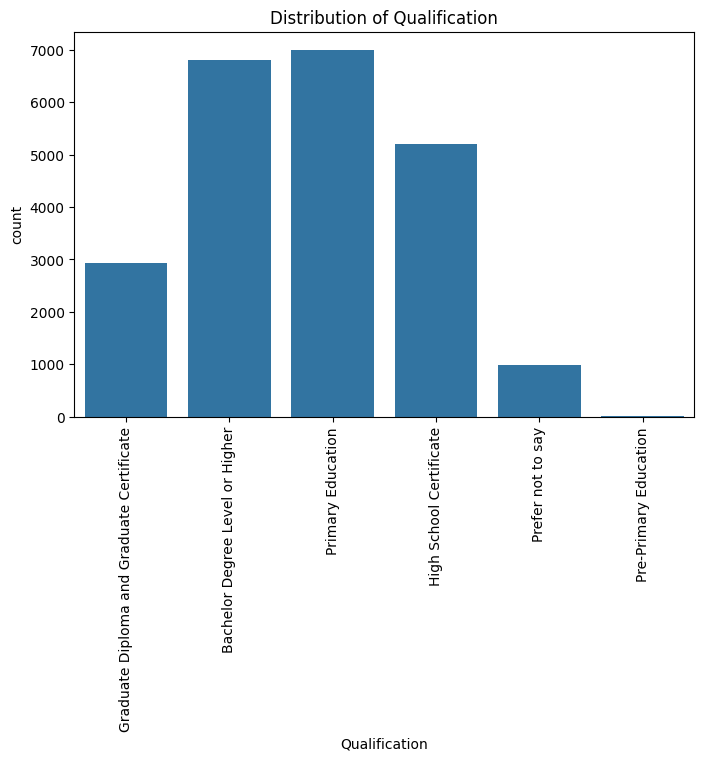

Counts for Qualification:
Qualification
Primary Education                            6996
Bachelor Degree Level or Higher              6815
High School Certificate                      5198
Graduate Diploma and Graduate Certificate    2934
Prefer not to say                             982
Pre-Primary Education                          15
Name: count, dtype: int64
Percentages for Qualification:
Qualification
Primary Education                            30.496949
Bachelor Degree Level or Higher              29.707934
High School Certificate                      22.659111
Graduate Diploma and Graduate Certificate    12.789887
Prefer not to say                             4.280732
Pre-Primary Education                         0.065388
Name: count, dtype: float64





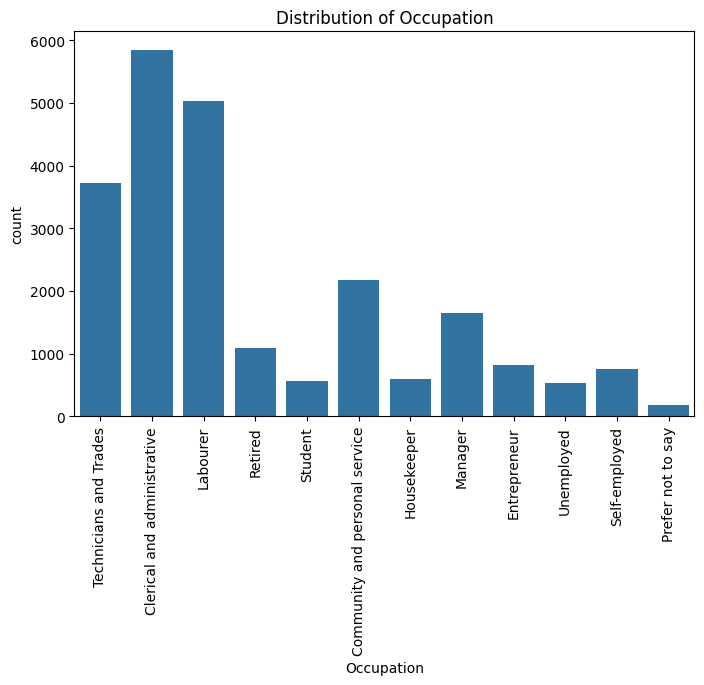

Counts for Occupation:
Occupation
Clerical and administrative       5850
Labourer                          5036
Technicians and Trades            3726
Community and personal service    2169
Manager                           1642
Retired                           1086
Entrepreneur                       813
Self-employed                      749
Housekeeper                        593
Student                            558
Unemployed                         536
Prefer not to say                  182
Name: count, dtype: int64
Percentages for Occupation:
Occupation
Clerical and administrative       25.501308
Labourer                          21.952921
Technicians and Trades            16.242371
Community and personal service     9.455100
Manager                            7.157803
Retired                            4.734089
Entrepreneur                       3.544028
Self-employed                      3.265039
Housekeeper                        2.585004
Student                            2.

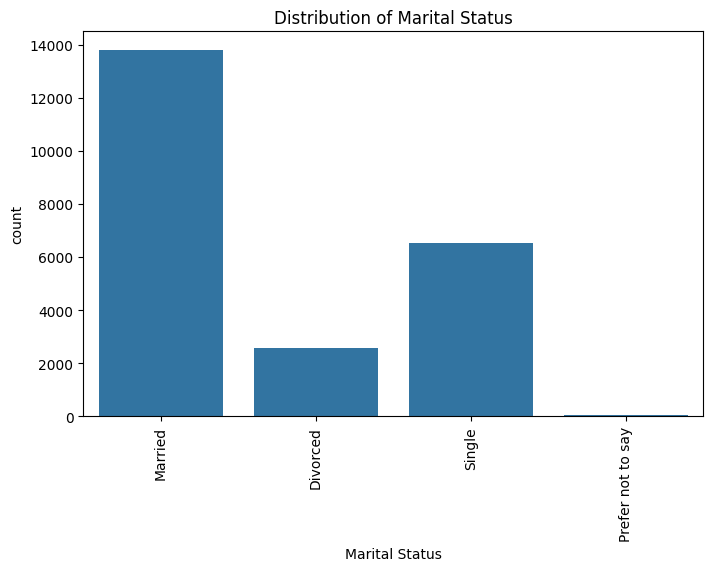

Counts for Marital Status:
Marital Status
Married              13804
Single                6526
Divorced              2559
Prefer not to say       51
Name: count, dtype: int64
Percentages for Marital Status:
Marital Status
Married              60.174368
Single               28.448126
Divorced             11.155187
Prefer not to say     0.222319
Name: count, dtype: float64





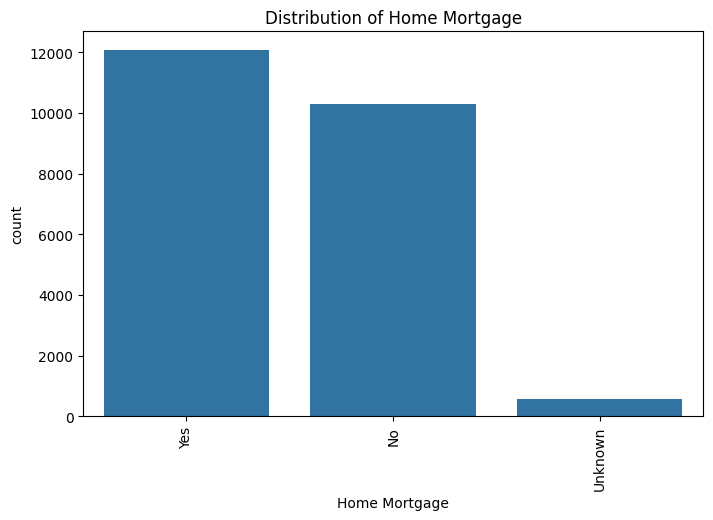

Counts for Home Mortgage:
Home Mortgage
Yes        12086
No         10284
Unknown      570
Name: count, dtype: int64
Percentages for Home Mortgage:
Home Mortgage
Yes        52.685266
No         44.829991
Unknown     2.484743
Name: count, dtype: float64





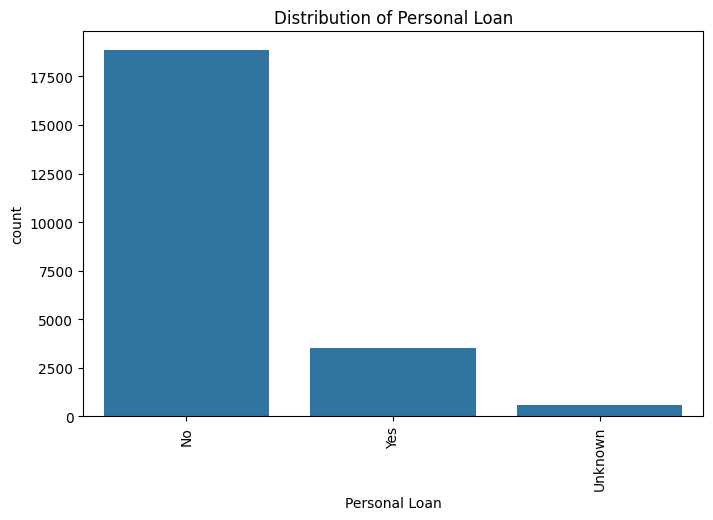

Counts for Personal Loan:
Personal Loan
No         18877
Yes         3493
Unknown      570
Name: count, dtype: int64
Percentages for Personal Loan:
Personal Loan
No         82.288579
Yes        15.226678
Unknown     2.484743
Name: count, dtype: float64





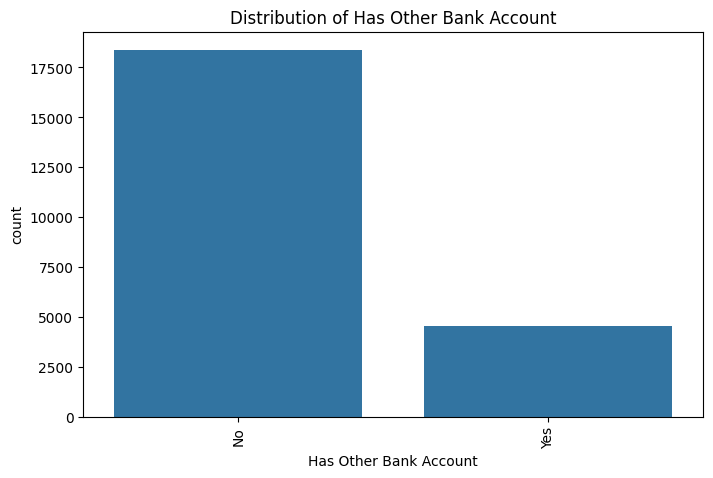

Counts for Has Other Bank Account:
Has Other Bank Account
No     18378
Yes     4562
Name: count, dtype: int64
Percentages for Has Other Bank Account:
Has Other Bank Account
No     80.113339
Yes    19.886661
Name: count, dtype: float64





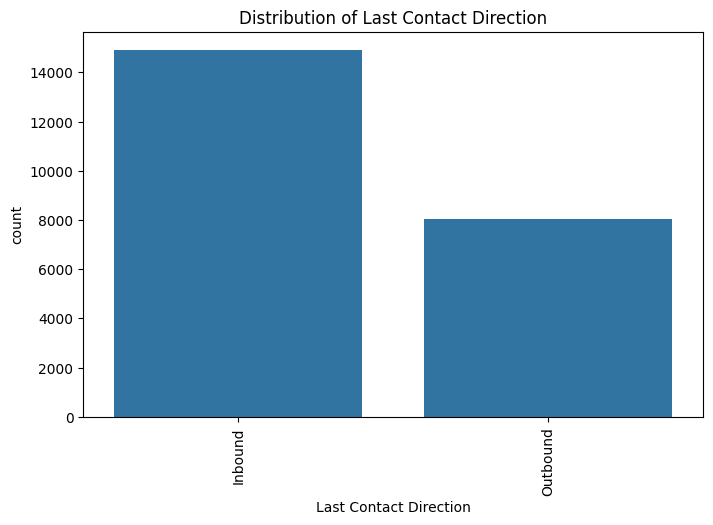

Counts for Last Contact Direction:
Last Contact Direction
Inbound     14904
Outbound     8036
Name: count, dtype: int64
Percentages for Last Contact Direction:
Last Contact Direction
Inbound     64.969486
Outbound    35.030514
Name: count, dtype: float64





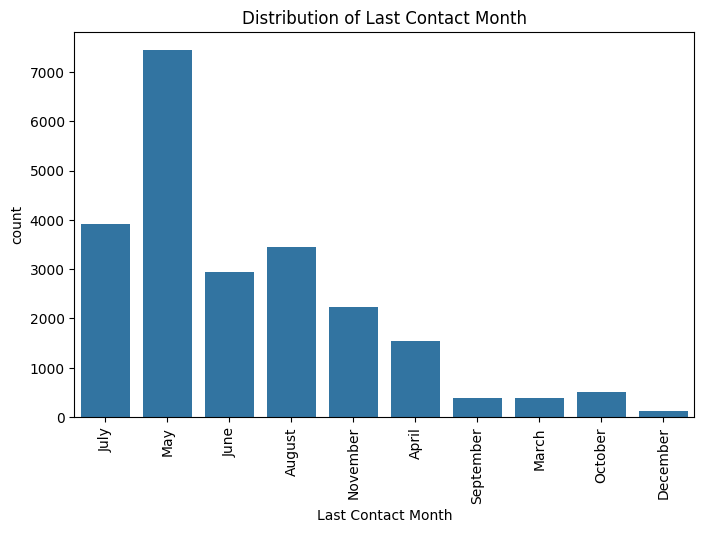

Counts for Last Contact Month:
Last Contact Month
May          7442
July         3919
August       3449
June         2937
November     2239
April        1534
October       509
September     393
March         389
December      129
Name: count, dtype: int64
Percentages for Last Contact Month:
Last Contact Month
May          32.441151
July         17.083697
August       15.034874
June         12.802964
November      9.760244
April         6.687010
October       2.218832
September     1.713165
March         1.695728
December      0.562337
Name: count, dtype: float64





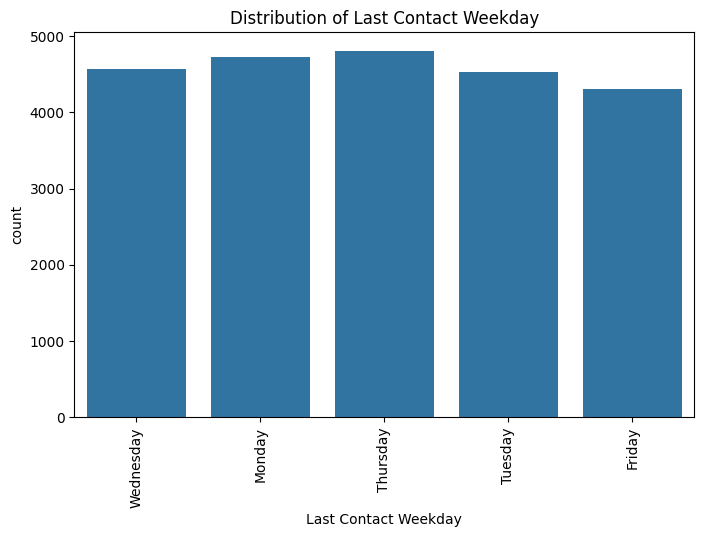

Counts for Last Contact Weekday:
Last Contact Weekday
Thursday     4812
Monday       4723
Wednesday    4567
Tuesday      4525
Friday       4313
Name: count, dtype: int64
Percentages for Last Contact Weekday:
Last Contact Weekday
Thursday     20.976460
Monday       20.588492
Wednesday    19.908457
Tuesday      19.725371
Friday       18.801221
Name: count, dtype: float64





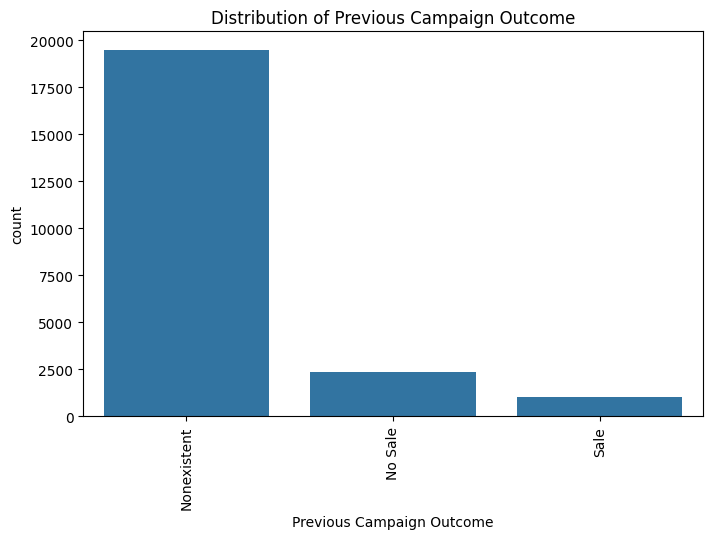

Counts for Previous Campaign Outcome:
Previous Campaign Outcome
Nonexistent    19505
No Sale         2381
Sale            1054
Name: count, dtype: int64
Percentages for Previous Campaign Outcome:
Previous Campaign Outcome
Nonexistent    85.026155
No Sale        10.379250
Sale            4.594595
Name: count, dtype: float64





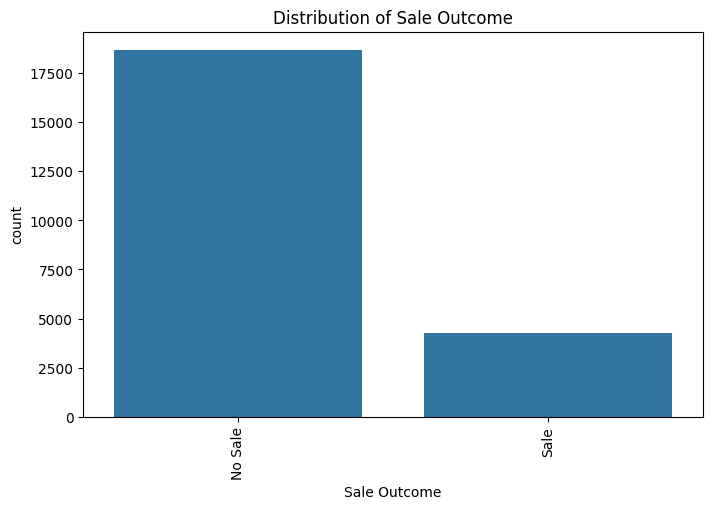

Counts for Sale Outcome:
Sale Outcome
No Sale    18677
Sale        4263
Name: count, dtype: int64
Percentages for Sale Outcome:
Sale Outcome
No Sale    81.416739
Sale       18.583261
Name: count, dtype: float64





In [ ]:
# Univariate Analysis for Categorical Variables:

for column in categorical_variables:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
    plt.show()  # Showing the figures

    # Calculating counts and percentages:
    counts = df[column].value_counts()
    total = df[column].notnull().sum()  # count only non-NA/null observations
    percentages = (counts / total) * 100

    # Displaying counts and percentages:
    print(f"Counts for {column}:\n{counts}")
    print(f"Percentages for {column}:\n{percentages}\n")
    print("\n")  # Space after plots

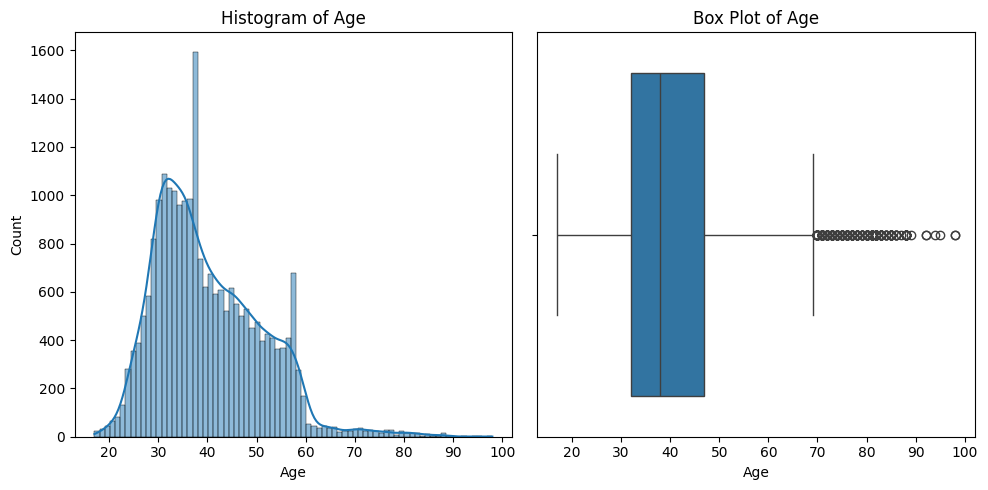



Summary statistics for Age:
count    22940.000000
mean        40.097602
std         10.799192
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: Age, dtype: float64





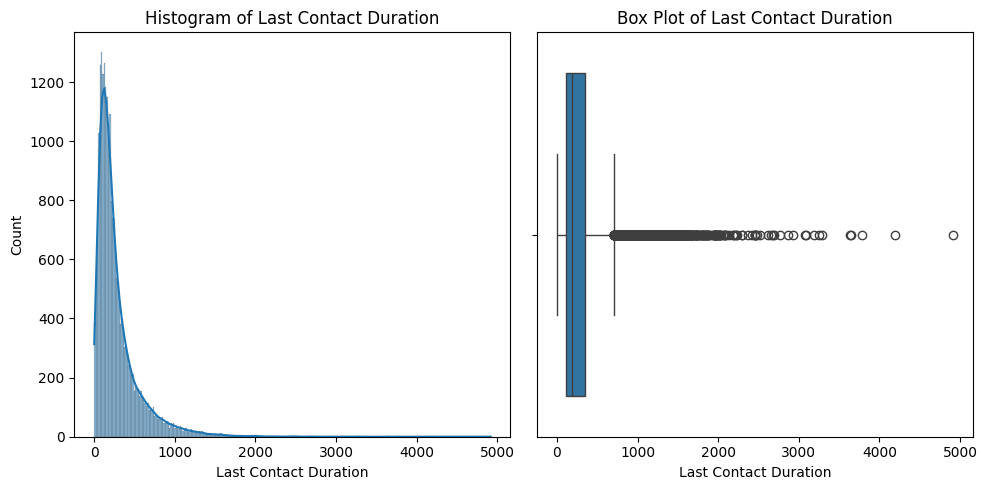



Summary statistics for Last Contact Duration:
count    22940.000000
mean       281.823147
std        285.375802
min          0.000000
25%        108.000000
50%        192.000000
75%        348.000000
max       4918.000000
Name: Last Contact Duration, dtype: float64





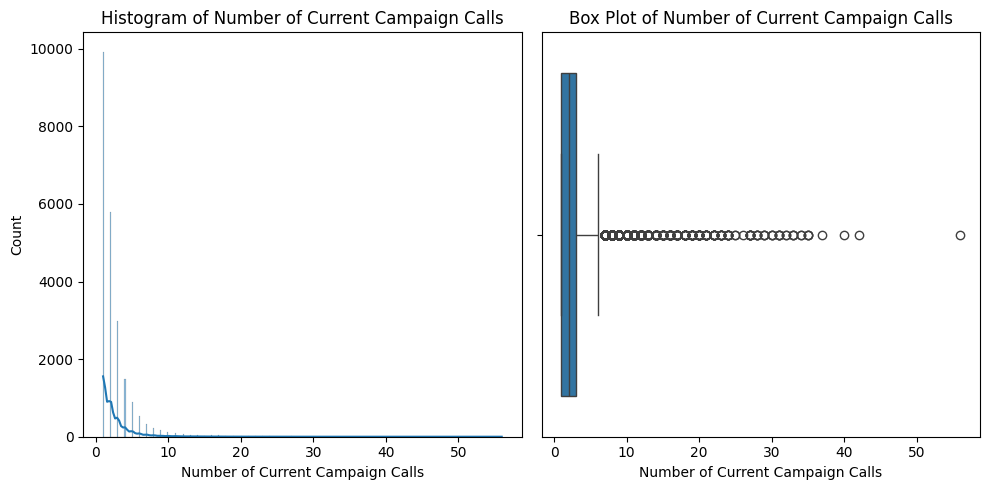



Summary statistics for Number of Current Campaign Calls:
count    22940.000000
mean         2.542938
std          2.702480
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: Number of Current Campaign Calls, dtype: float64





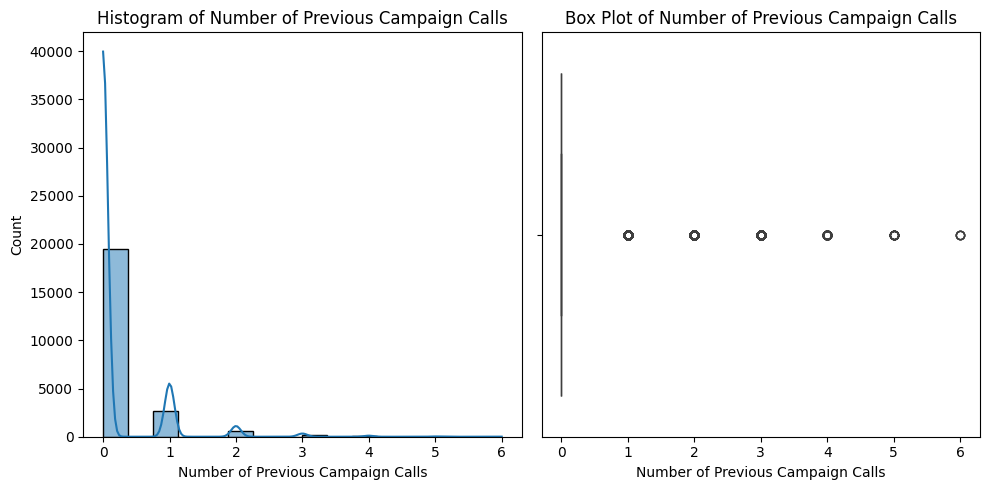



Summary statistics for Number of Previous Campaign Calls:
count    22940.000000
mean         0.199215
std          0.543082
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: Number of Previous Campaign Calls, dtype: float64





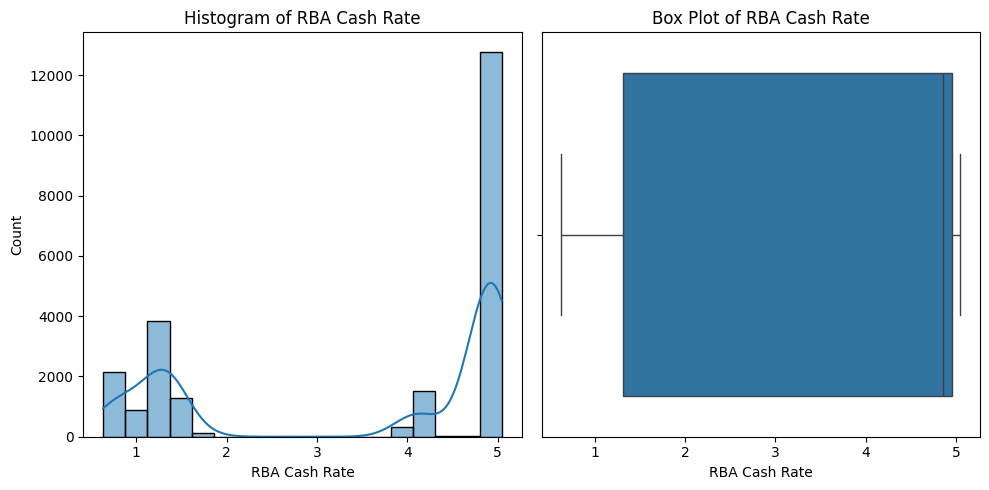



Summary statistics for RBA Cash Rate:
count    22940.000000
mean         3.495762
std          1.785776
min          0.634000
25%          1.313000
50%          4.857000
75%          4.961000
max          5.045000
Name: RBA Cash Rate, dtype: float64





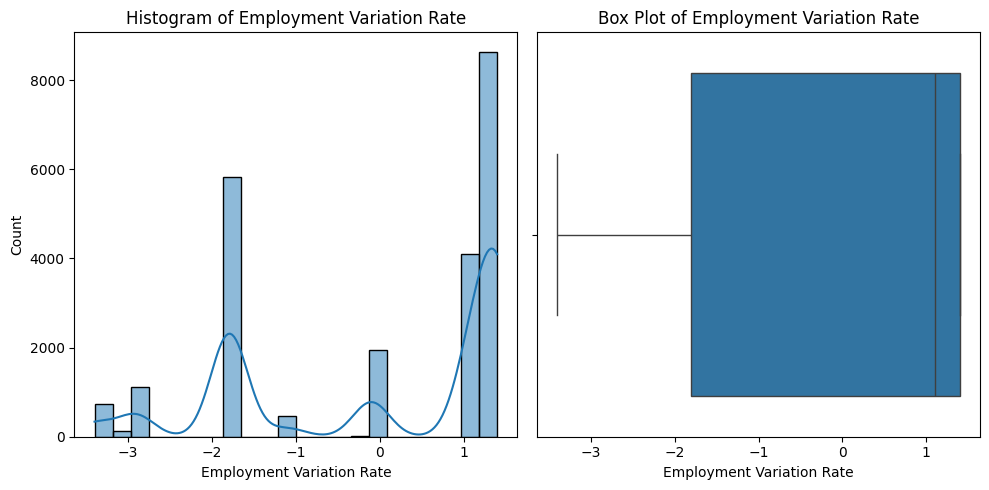



Summary statistics for Employment Variation Rate:
count    22940.000000
mean        -0.027541
std          1.619152
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: Employment Variation Rate, dtype: float64





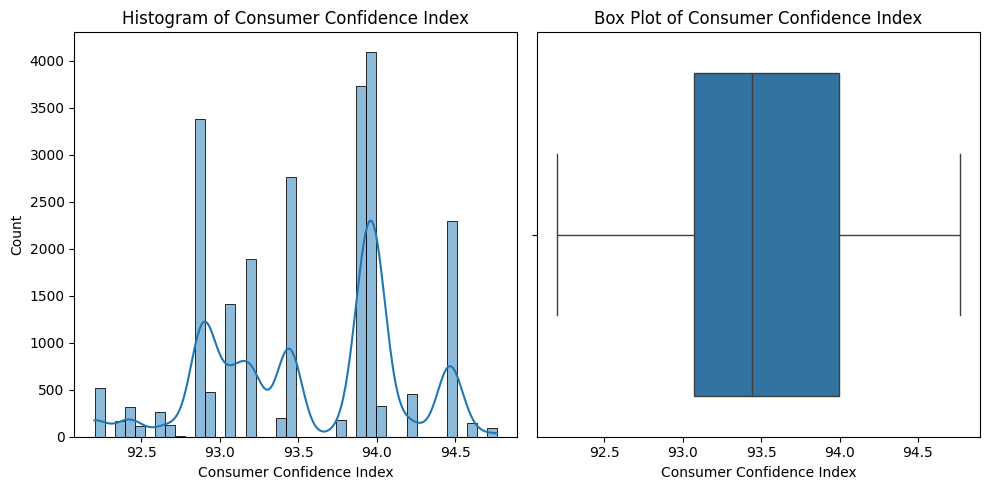



Summary statistics for Consumer Confidence Index:
count    22940.000000
mean        93.557365
std          0.592104
min         92.201000
25%         93.075000
50%         93.444000
75%         93.994000
max         94.767000
Name: Consumer Confidence Index, dtype: float64





In [ ]:
# Univariate Analysis for Numerical Variables:

for column in numerical_variables:

    plt.figure(figsize=(10, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')

    plt.tight_layout()  # Preventing overlap
    plt.show()  # Showing the figures
    print("\n")

    # Displaying Summary statistics:
    print(f"Summary statistics for {column}:\n{df[column].describe()}\n")
    print("\n")

### **Bivariate Analysis**

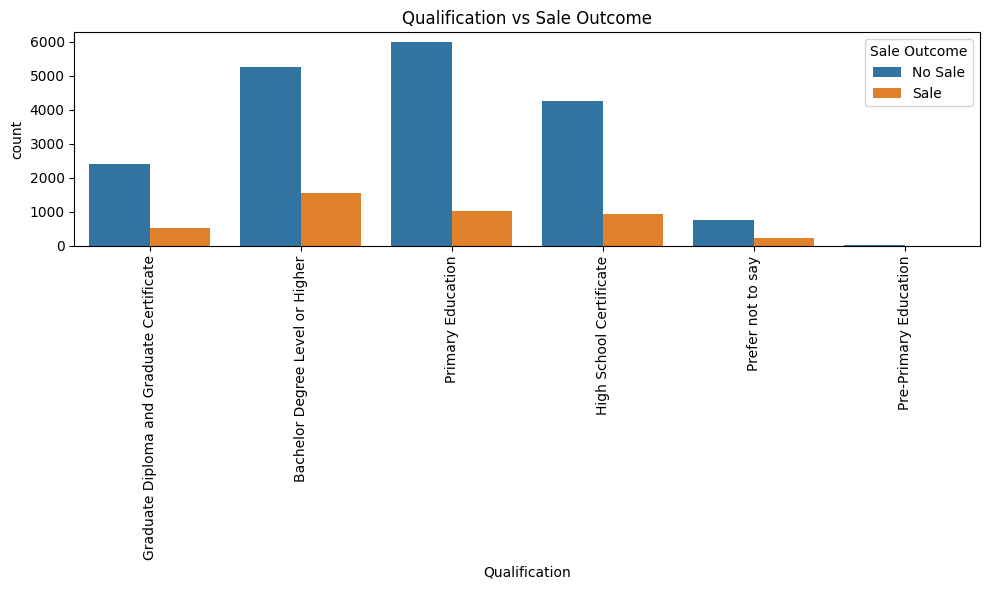

Counts for Qualification:
Sale Outcome                               No Sale  Sale
Qualification                                           
Bachelor Degree Level or Higher               5273  1542
Graduate Diploma and Graduate Certificate     2401   533
High School Certificate                       4262   936
Pre-Primary Education                           11     4
Prefer not to say                              748   234
Primary Education                             5982  1014
Percentages for Qualification:
Sale Outcome                                 No Sale       Sale
Qualification                                                  
Bachelor Degree Level or Higher            77.373441  22.626559
Graduate Diploma and Graduate Certificate  81.833674  18.166326
High School Certificate                    81.993074  18.006926
Pre-Primary Education                      73.333333  26.666667
Prefer not to say                          76.171079  23.828921
Primary Education                      

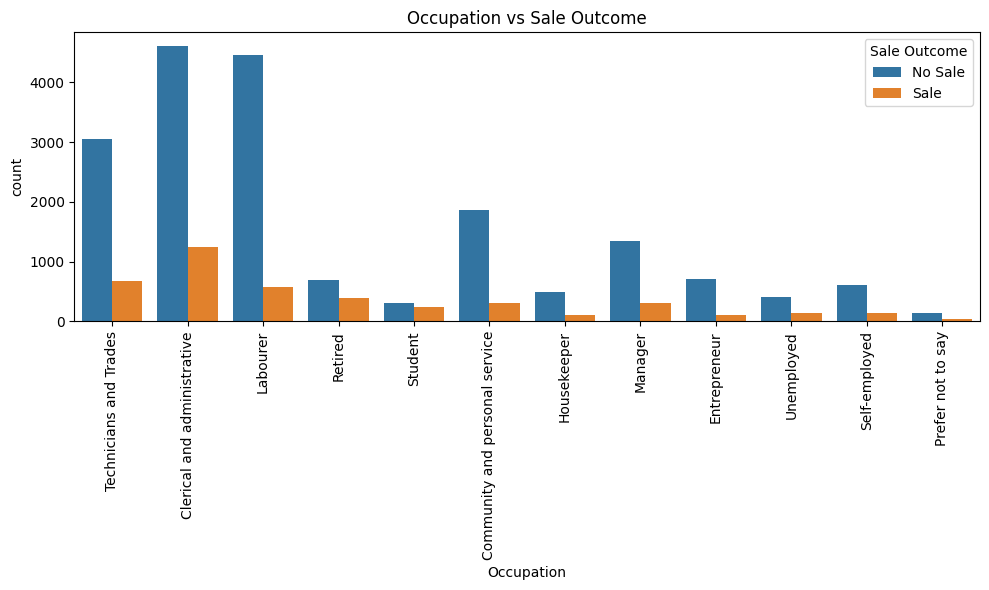

Counts for Occupation:
Sale Outcome                    No Sale  Sale
Occupation                                   
Clerical and administrative        4607  1243
Community and personal service     1864   305
Entrepreneur                        702   111
Housekeeper                         493   100
Labourer                           4456   580
Manager                            1341   301
Prefer not to say                   148    34
Retired                             693   393
Self-employed                       610   139
Student                             310   248
Technicians and Trades             3050   676
Unemployed                          403   133
Percentages for Occupation:
Sale Outcome                      No Sale       Sale
Occupation                                          
Clerical and administrative     78.752137  21.247863
Community and personal service  85.938220  14.061780
Entrepreneur                    86.346863  13.653137
Housekeeper                     83.13659

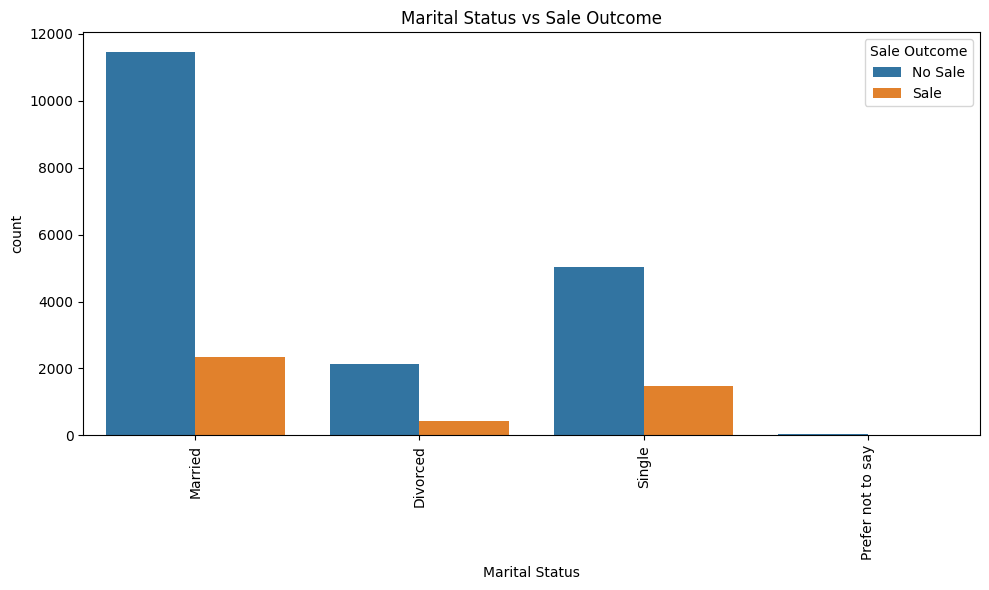

Counts for Marital Status:
Sale Outcome       No Sale  Sale
Marital Status                  
Divorced              2131   428
Married              11465  2339
Prefer not to say       39    12
Single                5042  1484
Percentages for Marital Status:
Sale Outcome         No Sale       Sale
Marital Status                         
Divorced           83.274717  16.725283
Married            83.055636  16.944364
Prefer not to say  76.470588  23.529412
Single             77.260190  22.739810





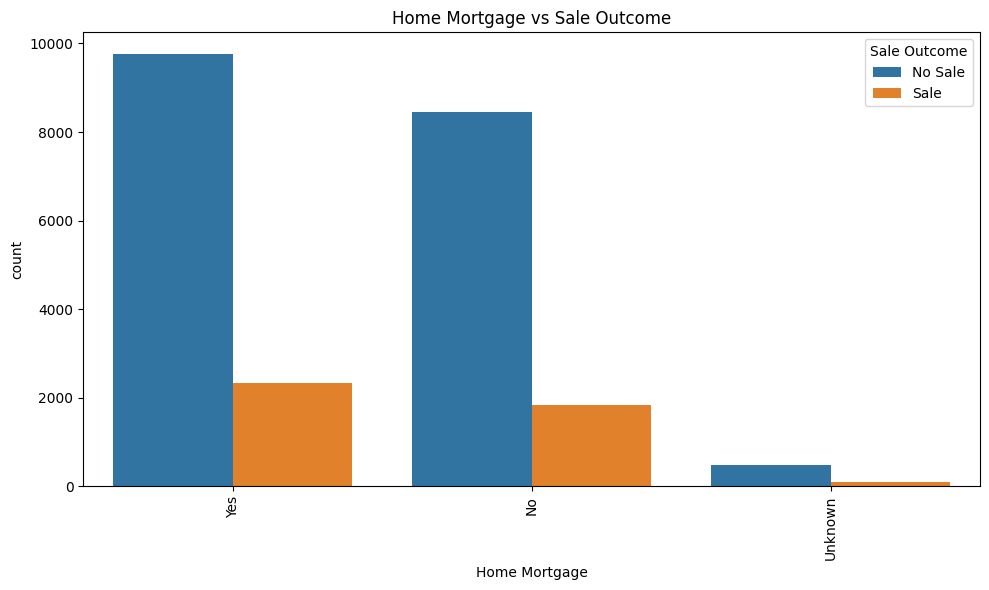

Counts for Home Mortgage:
Sale Outcome   No Sale  Sale
Home Mortgage               
No                8443  1841
Unknown            471    99
Yes               9763  2323
Percentages for Home Mortgage:
Sale Outcome     No Sale       Sale
Home Mortgage                      
No             82.098405  17.901595
Unknown        82.631579  17.368421
Yes            80.779414  19.220586





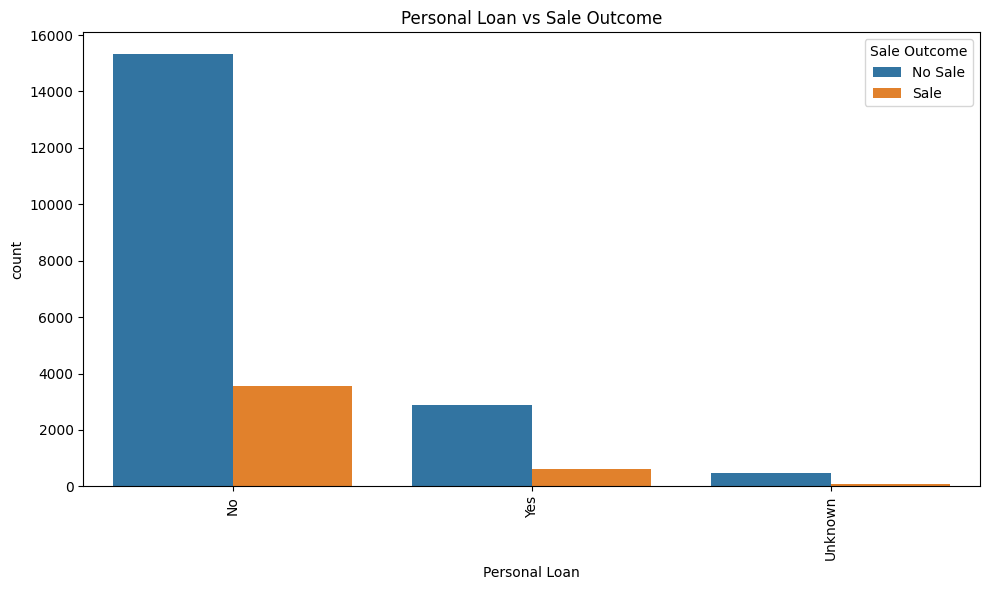

Counts for Personal Loan:
Sale Outcome   No Sale  Sale
Personal Loan               
No               15330  3547
Unknown            471    99
Yes               2876   617
Percentages for Personal Loan:
Sale Outcome     No Sale       Sale
Personal Loan                      
No             81.209938  18.790062
Unknown        82.631579  17.368421
Yes            82.336101  17.663899





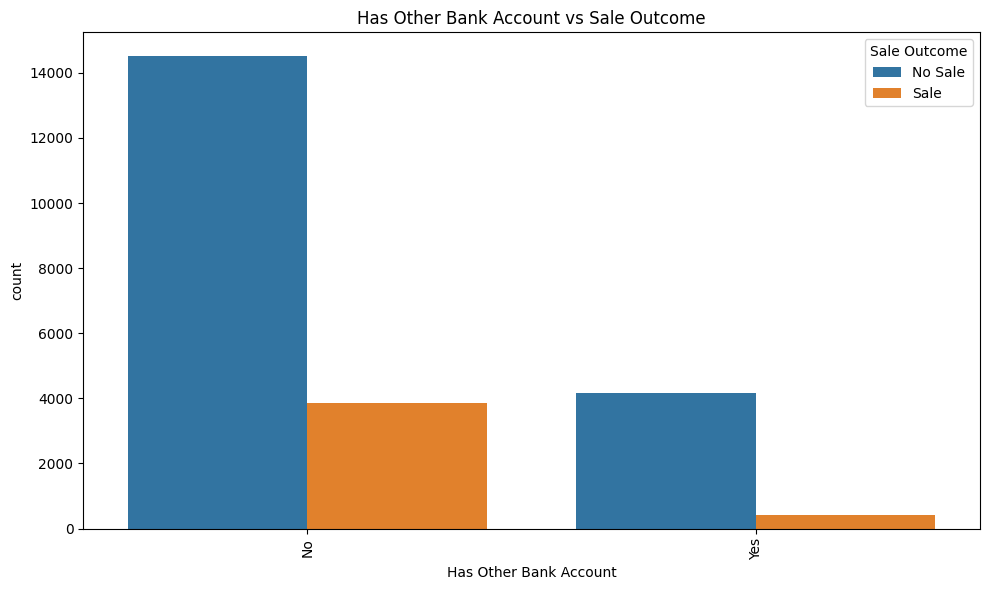

Counts for Has Other Bank Account:
Sale Outcome            No Sale  Sale
Has Other Bank Account               
No                        14520  3858
Yes                        4157   405
Percentages for Has Other Bank Account:
Sale Outcome              No Sale       Sale
Has Other Bank Account                      
No                      79.007509  20.992491
Yes                     91.122315   8.877685





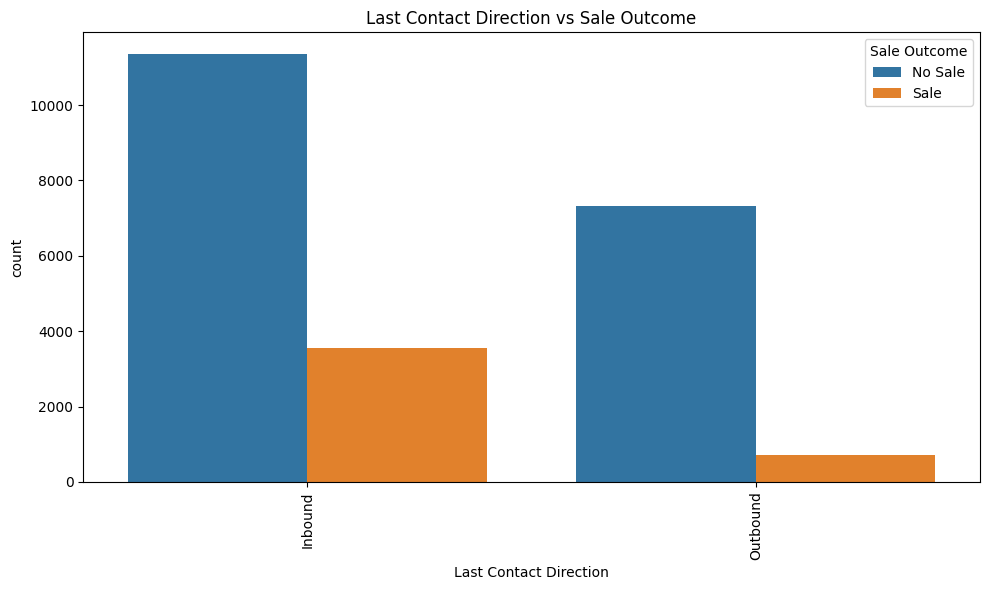

Counts for Last Contact Direction:
Sale Outcome            No Sale  Sale
Last Contact Direction               
Inbound                   11364  3540
Outbound                   7313   723
Percentages for Last Contact Direction:
Sale Outcome              No Sale       Sale
Last Contact Direction                      
Inbound                 76.247987  23.752013
Outbound                91.002987   8.997013





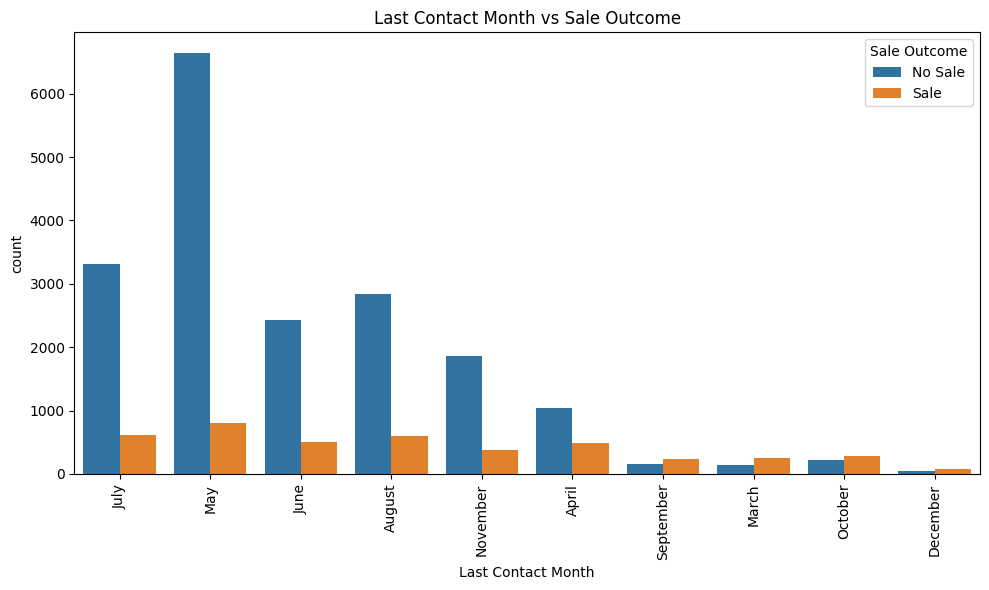

Counts for Last Contact Month:
Sale Outcome        No Sale  Sale
Last Contact Month               
April                  1039   495
August                 2845   604
December                 47    82
July                   3305   614
June                   2432   505
March                   136   253
May                    6636   806
November               1862   377
October                 224   285
September               151   242
Percentages for Last Contact Month:
Sale Outcome          No Sale       Sale
Last Contact Month                      
April               67.731421  32.268579
August              82.487678  17.512322
December            36.434109  63.565891
July                84.332738  15.667262
June                82.805584  17.194416
March               34.961440  65.038560
May                 89.169578  10.830422
November            83.162126  16.837874
October             44.007859  55.992141
September           38.422392  61.577608





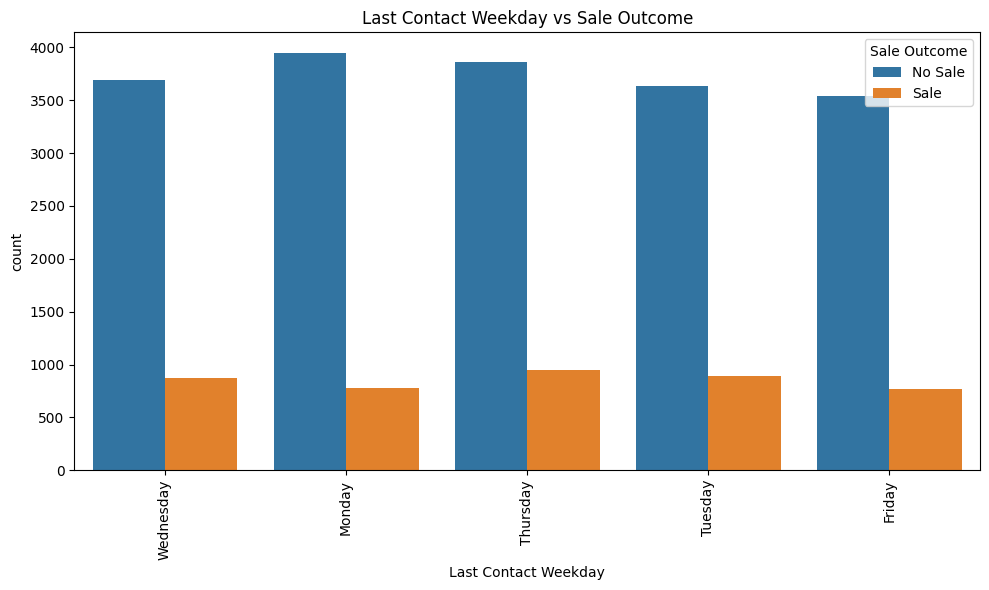

Counts for Last Contact Weekday:
Sale Outcome          No Sale  Sale
Last Contact Weekday               
Friday                   3541   772
Monday                   3945   778
Thursday                 3865   947
Tuesday                  3632   893
Wednesday                3694   873
Percentages for Last Contact Weekday:
Sale Outcome            No Sale       Sale
Last Contact Weekday                      
Friday                82.100626  17.899374
Monday                83.527419  16.472581
Thursday              80.320033  19.679967
Tuesday               80.265193  19.734807
Wednesday             80.884607  19.115393





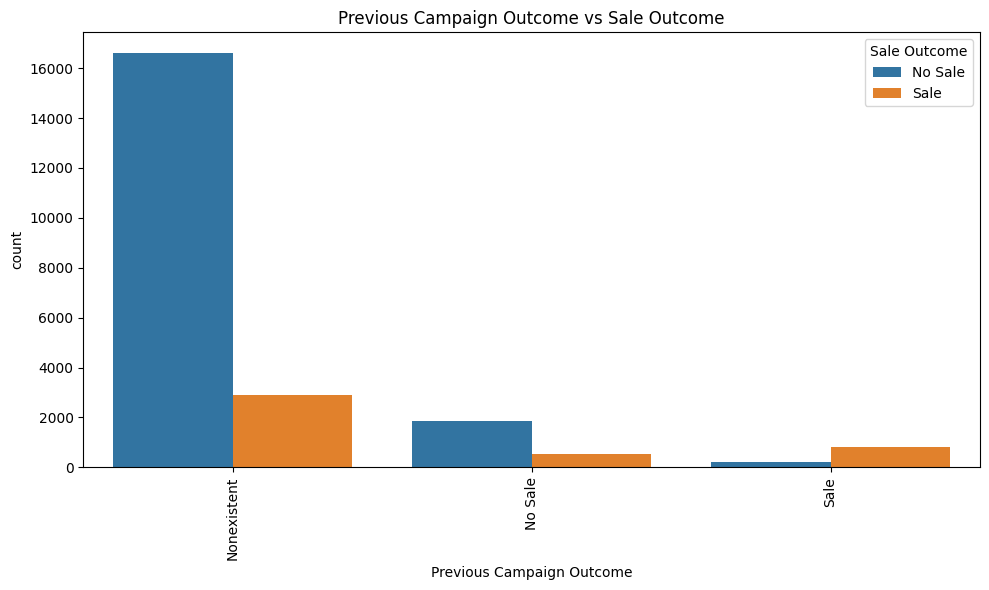

Counts for Previous Campaign Outcome:
Sale Outcome               No Sale  Sale
Previous Campaign Outcome               
No Sale                       1839   542
Nonexistent                  16605  2900
Sale                           233   821
Percentages for Previous Campaign Outcome:
Sale Outcome                 No Sale       Sale
Previous Campaign Outcome                      
No Sale                    77.236455  22.763545
Nonexistent                85.132017  14.867983
Sale                       22.106262  77.893738





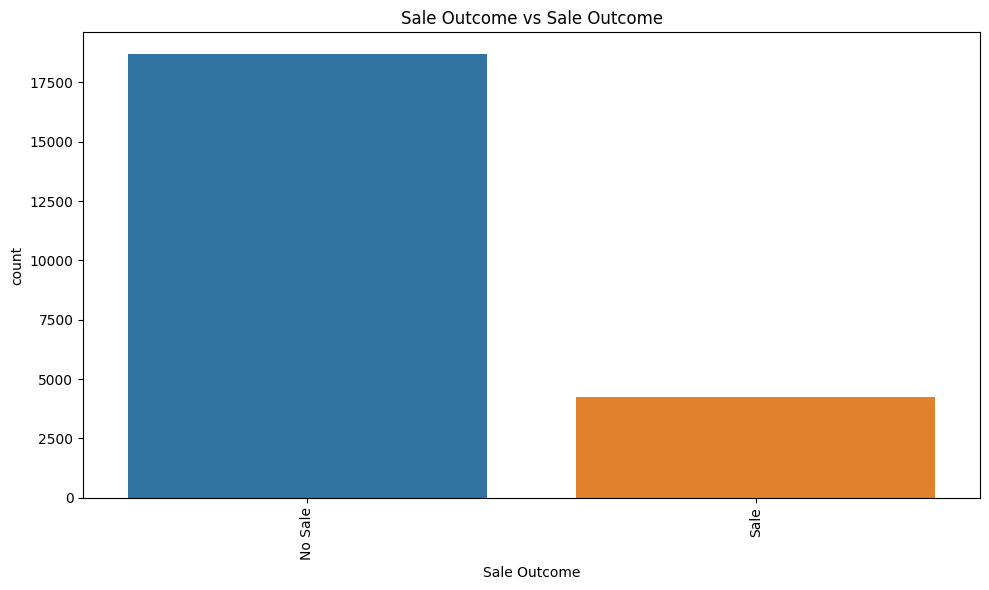

Counts for Sale Outcome:
Sale Outcome  No Sale  Sale
Sale Outcome               
No Sale         18677     0
Sale                0  4263
Percentages for Sale Outcome:
Sale Outcome  No Sale   Sale
Sale Outcome                
No Sale         100.0    0.0
Sale              0.0  100.0





In [ ]:
# Bivariate Analysis for Categorical Variables with Sale Outcome:
for column in categorical_variables:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x=column, hue='Sale Outcome')
    plt.title(f'{column} vs Sale Outcome')
    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

    # Calculating counts and percentages for the categorical variable:
    counts = pd.crosstab(df[column], df['Sale Outcome'])
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100

    # Displaying counts and percentages:
    print(f"Counts for {column}:\n{counts}")
    print(f"Percentages for {column}:\n{percentages}\n")
    print("\n")

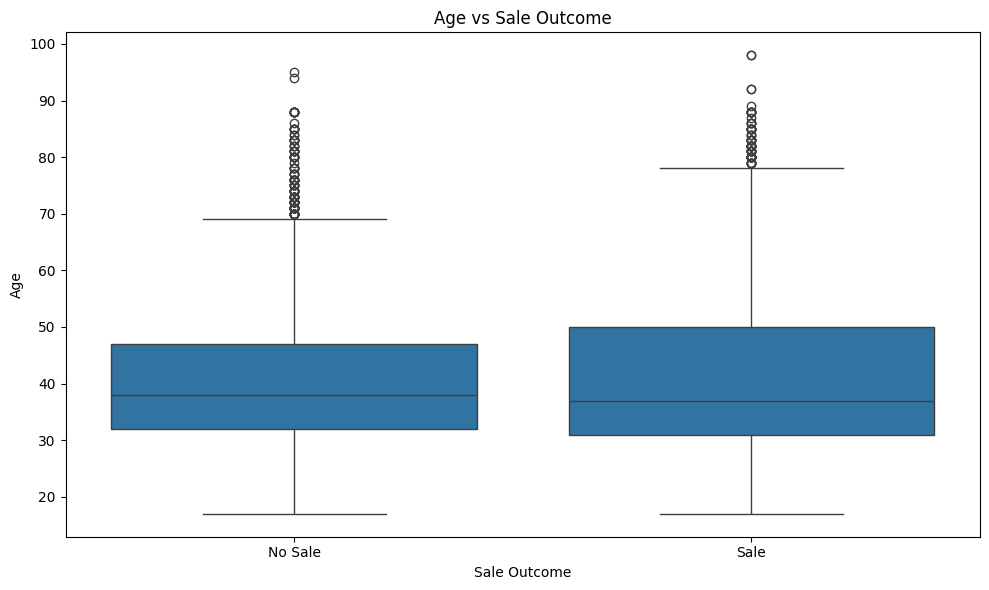

Summary statistics for Age by Sale Outcome:
                count       mean        std   min   25%   50%   75%   max
Sale Outcome                                                             
No Sale       18677.0  39.912834   9.983838  17.0  32.0  38.0  47.0  95.0
Sale           4263.0  40.907108  13.787667  17.0  31.0  37.0  50.0  98.0





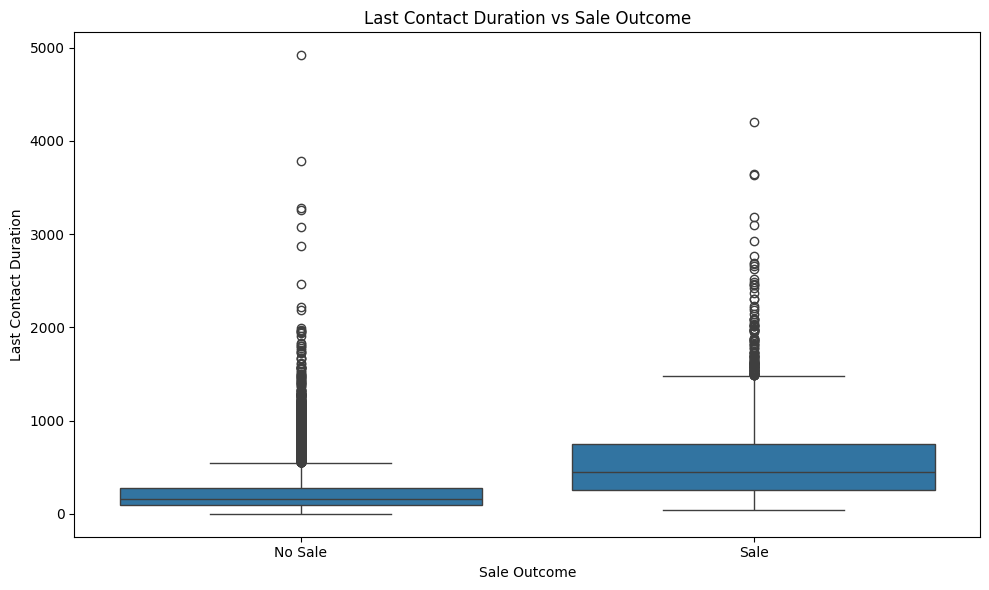

Summary statistics for Last Contact Duration by Sale Outcome:
                count        mean         std   min    25%    50%    75%  \
Sale Outcome                                                               
No Sale       18677.0  220.257429  206.817774   0.0   95.0  164.0  277.0   
Sale           4263.0  551.554070  401.881979  37.0  251.5  445.0  743.5   

                 max  
Sale Outcome          
No Sale       4918.0  
Sale          4199.0  





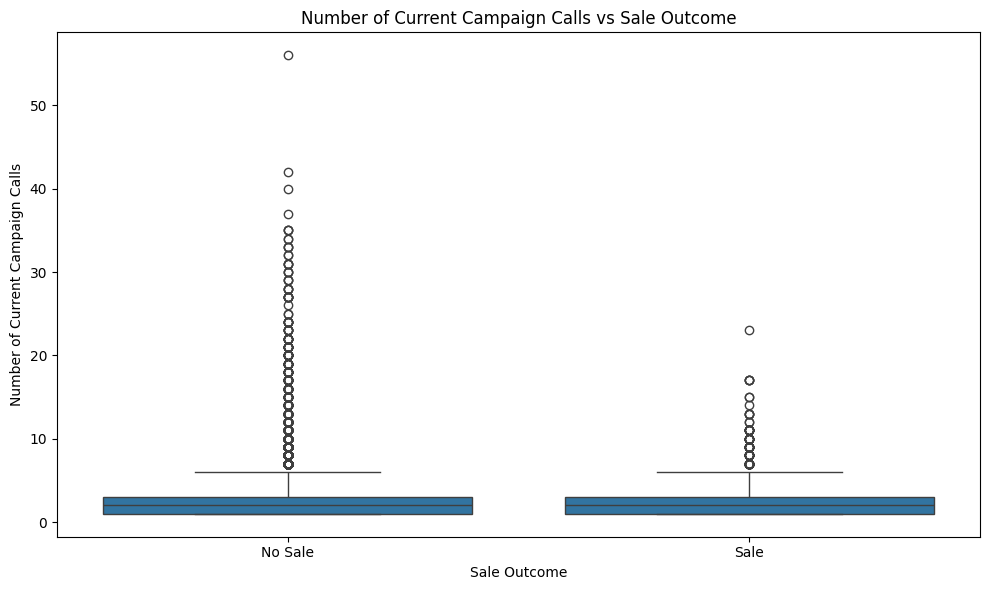

Summary statistics for Number of Current Campaign Calls by Sale Outcome:
                count      mean       std  min  25%  50%  75%   max
Sale Outcome                                                       
No Sale       18677.0  2.649623  2.873624  1.0  1.0  2.0  3.0  56.0
Sale           4263.0  2.075534  1.689651  1.0  1.0  2.0  3.0  23.0





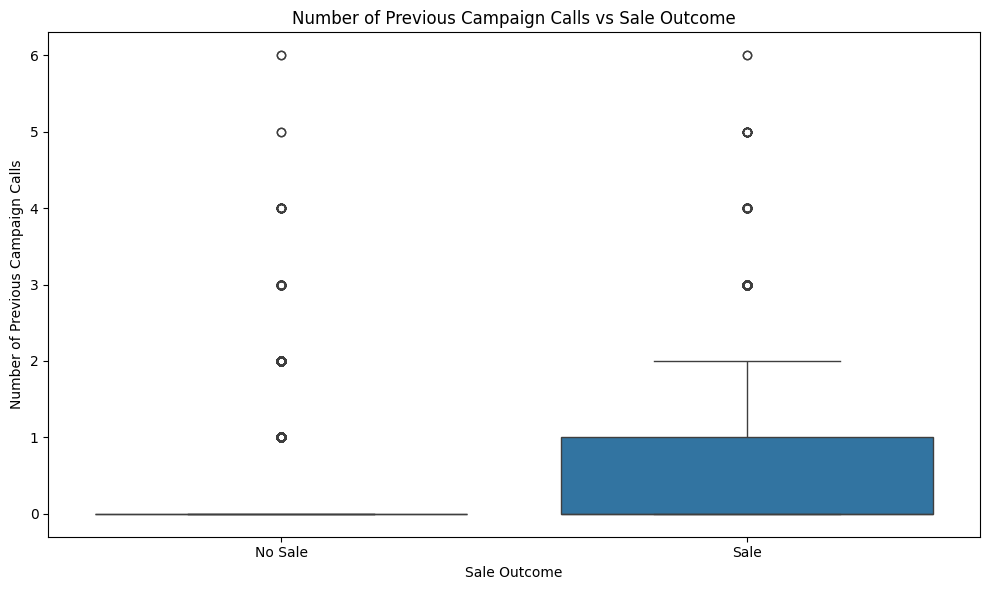

Summary statistics for Number of Previous Campaign Calls by Sale Outcome:
                count      mean       std  min  25%  50%  75%  max
Sale Outcome                                                      
No Sale       18677.0  0.132034  0.410585  0.0  0.0  0.0  0.0  6.0
Sale           4263.0  0.493549  0.861553  0.0  0.0  0.0  1.0  6.0





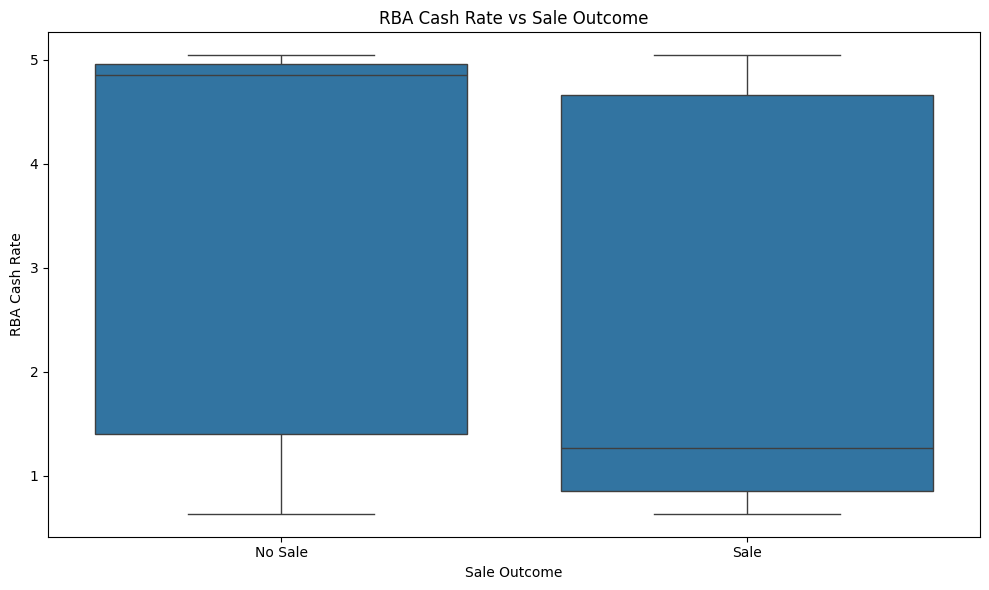

Summary statistics for RBA Cash Rate by Sale Outcome:
                count      mean       std    min    25%    50%    75%    max
Sale Outcome                                                                
No Sale       18677.0  3.808690  1.641542  0.634  1.405  4.857  4.962  5.045
Sale           4263.0  2.124769  1.745487  0.634  0.849  1.266  4.663  5.045





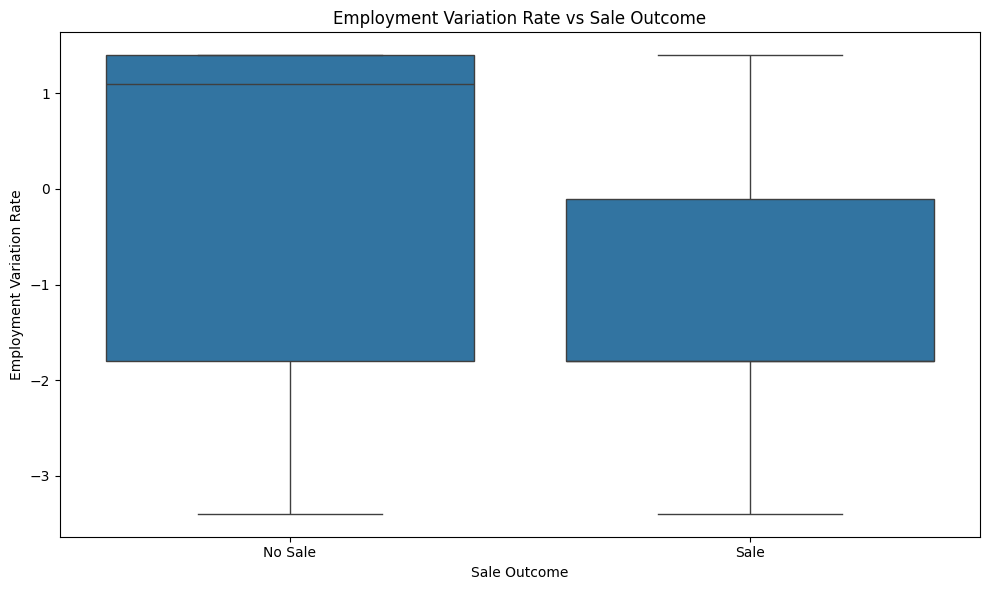

Summary statistics for Employment Variation Rate by Sale Outcome:
                count      mean       std  min  25%  50%  75%  max
Sale Outcome                                                      
No Sale       18677.0  0.247229  1.486056 -3.4 -1.8  1.1  1.4  1.4
Sale           4263.0 -1.231363  1.628780 -3.4 -1.8 -1.8 -0.1  1.4





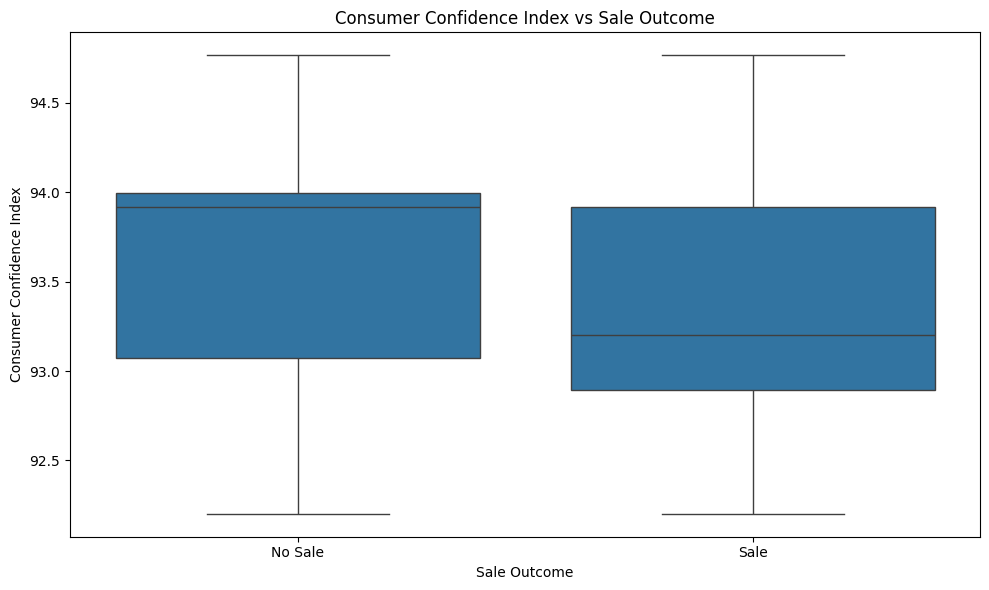

Summary statistics for Consumer Confidence Index by Sale Outcome:
                count       mean       std     min     25%     50%     75%  \
Sale Outcome                                                                 
No Sale       18677.0  93.603692  0.560771  92.201  93.075  93.918  93.994   
Sale           4263.0  93.354399  0.677015  92.201  92.893  93.200  93.918   

                 max  
Sale Outcome          
No Sale       94.767  
Sale          94.767  





In [ ]:
# Bivariate Analysis for Numerical Variables with Sale Outcome:
for column in numerical_variables:
    plt.figure(figsize=(10, 6))

    sns.boxplot(data=df, x='Sale Outcome', y=column)
    plt.title(f'{column} vs Sale Outcome')
    plt.xticks(rotation=0)

    plt.tight_layout()
    plt.show()

    # Calculating and displaying Summary Statistics for each Sale Outcome category:
    summary_stats = df.groupby('Sale Outcome')[column].describe()
    print(f"Summary statistics for {column} by Sale Outcome:\n{summary_stats}\n")
    print("\n")


### **Multivariate Analysis**

In [ ]:
# Applying label encoding to categorical columns:
label_encoder = LabelEncoder()

label_mappings = {}  # Dictionary to store the mappings

for column in categorical_variables:
    df[column] = label_encoder.fit_transform(df[column])

# Storing the mappings
    label_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [ ]:
# Displaying the mappings for each categorical column:
for column, mapping in label_mappings.items():
    print(f"Label encoding for {column}:")
    for category, encoded_value in mapping.items():
        print(f"  {category}: {encoded_value}")
    print("\n")

# Displaying the first few rows of the dataframe to see the encoded values:
df.head()

Label encoding for Qualification:
  Bachelor Degree Level or Higher: 0
  Graduate Diploma and Graduate Certificate: 1
  High School Certificate: 2
  Pre-Primary Education: 3
  Prefer not to say: 4
  Primary Education: 5


Label encoding for Occupation:
  Clerical and administrative: 0
  Community and personal service: 1
  Entrepreneur: 2
  Housekeeper: 3
  Labourer: 4
  Manager: 5
  Prefer not to say: 6
  Retired: 7
  Self-employed: 8
  Student: 9
  Technicians and Trades: 10
  Unemployed: 11


Label encoding for Marital Status:
  Divorced: 0
  Married: 1
  Prefer not to say: 2
  Single: 3


Label encoding for Home Mortgage:
  No: 0
  Unknown: 1
  Yes: 2


Label encoding for Personal Loan:
  No: 0
  Unknown: 1
  Yes: 2


Label encoding for Has Other Bank Account:
  No: 0
  Yes: 1


Label encoding for Last Contact Direction:
  Inbound: 0
  Outbound: 1


Label encoding for Last Contact Month:
  April: 0
  August: 1
  December: 2
  July: 3
  June: 4
  March: 5
  May: 6
  November: 7
  Oct

Age  Qualification  Occupation  Marital Status  Home Mortgage  \
0   32              1          10               1              2   
1   39              0           0               1              0   
2   36              1          10               0              0   
3   44              5           4               1              2   
4   38              1          10               1              0   

   Personal Loan  Has Other Bank Account  Last Contact Direction  \
0              0                       0                       0   
1              0                       0                       1   
2              0                       0                       0   
3              0                       0                       0   
4              0                       0                       1   

   Last Contact Duration  Last Contact Month  Last Contact Weekday  \
0                  172.0                   3                     4   
1                  744.0                   6                     1   
2                   31.0                   6                     2   
3                  102.0                   6                     2   
4                  436.0                   6                     2   

   Number of Current Campaign Calls  Number of Previous Campaign Calls  \
0                                 2                                0.0   
1                                 6                                0.0   
2                                 1                                0.0   
3                                 1                                0.0   
4                                 1                                0.0   

   Previous Campaign Outcome  RBA Cash Rate  Employment Variation Rate  \
0                          1          4.963                        1.4   
1                          1          4.857                        1.1   
2                          1          1.327                       -1.8   
3                          1          1.327                       -1.8   
4                          1          4.860                        1.1   

   Consumer Confidence Index  Sale Outcome  
0                     93.918             0  
1                     93.994             1  
2                     92.893             0  
3                     92.893             0  
4                     93.994             0

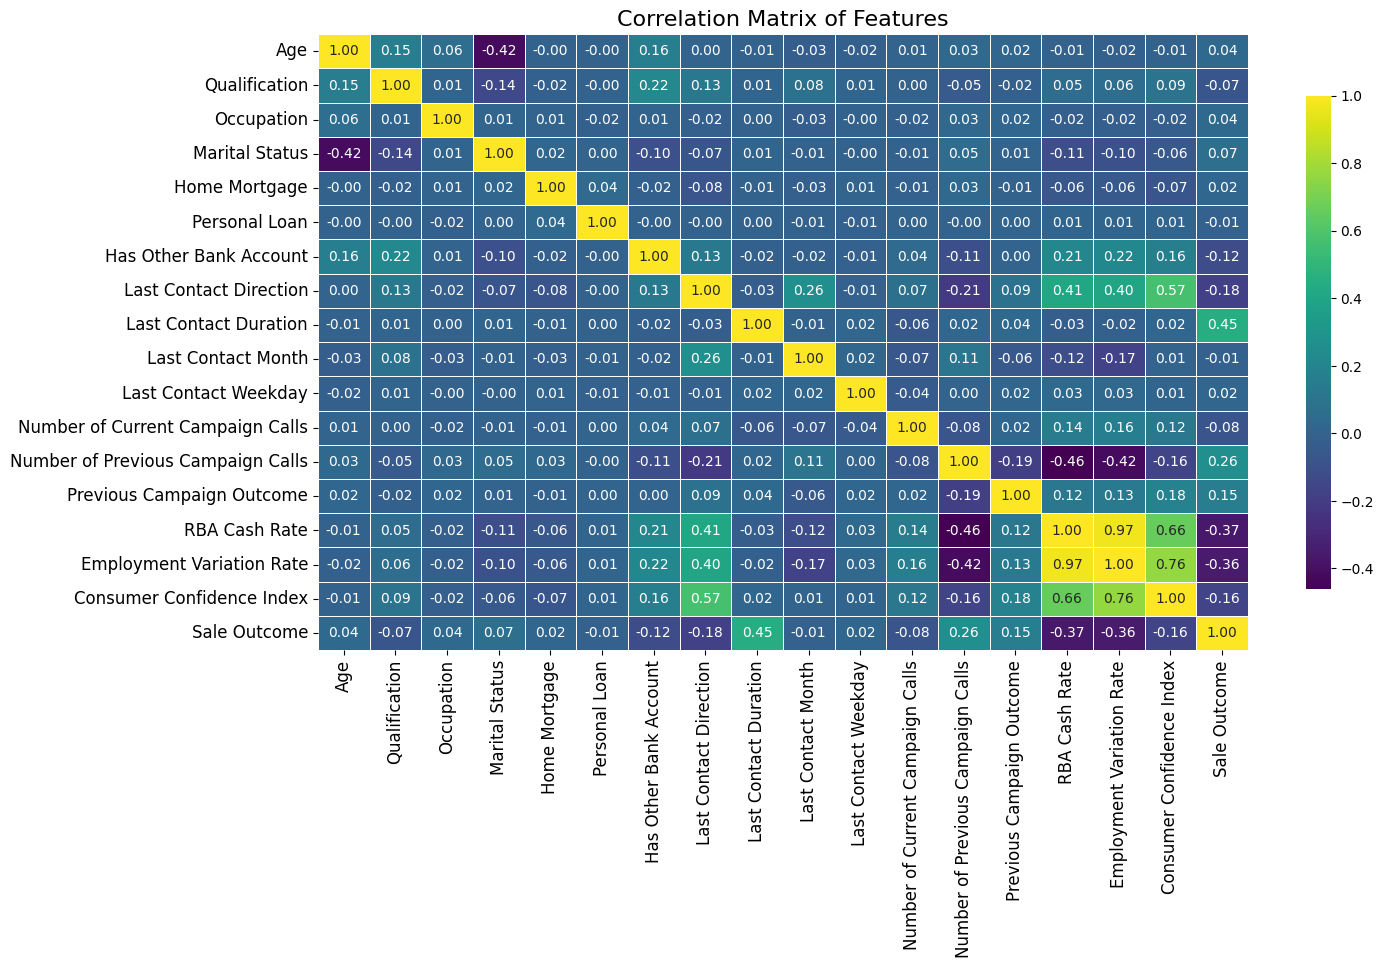

In [ ]:
# Calculating the correlation matrix:
correlation_matrix = df.corr()

# Setting up the figure size:
plt.figure(figsize=(15, 8))

# Displaying the heatmap:
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, cbar_kws={'shrink': .8})
plt.title('Correlation Matrix of Features', fontsize=16)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.show()

**Feature Selection**

Selecting Predictors and Taget Variable

In [ ]:
# Calculating the correlation matrix:
correlation_matrix = df.corr()

# Setting the threshold:
threshold = 0.5

# Extracting the correlations with the target variable 'Sale Outcome':
correlations_with_sale_outcome = correlation_matrix['Sale Outcome']

# Filtering out predictors with their correlation below the threshold:
predictors_below_threshold = correlations_with_sale_outcome[correlations_with_sale_outcome.abs() < threshold].index.tolist()

# Defining the feature set and the target variable:
X = df[predictors_below_threshold]
y = df['Sale Outcome']

# Displaying the output of predictors and target variable:
print("Selected predictors:")
print(predictors_below_threshold)
print("\nTarget variable:")
print('Sale Outcome')

Selected predictors:
['Age', 'Qualification', 'Occupation', 'Marital Status', 'Home Mortgage', 'Personal Loan', 'Has Other Bank Account', 'Last Contact Direction', 'Last Contact Duration', 'Last Contact Month', 'Last Contact Weekday', 'Number of Current Campaign Calls', 'Number of Previous Campaign Calls', 'Previous Campaign Outcome', 'RBA Cash Rate', 'Employment Variation Rate', 'Consumer Confidence Index']

Target variable:
Sale Outcome


**Normalising and Train-Test Split**

In [ ]:
# Normalising the features:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=2024)

# **1. kNN Classifier**

In [ ]:
# Initialising the kNN classifier with k=5:
k = 5
knn = KNeighborsClassifier(n_neighbors=k, p=2) #p = 2, the distance metric becomes the Euclidean distance (also known as the L2 norm)

# Training the model:
knn.fit(X_train, y_train)

# Making predictions:
y_pred = knn.predict(X_test)

## Evaluating the model

In [ ]:
# Confusion Matrix:

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[5337  264]
 [ 680  601]]


In [ ]:
# Classification Report:

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5601
           1       0.69      0.47      0.56      1281

    accuracy                           0.86      6882
   macro avg       0.79      0.71      0.74      6882
weighted avg       0.85      0.86      0.85      6882



ROC AUC Score:
0.8689004737500177


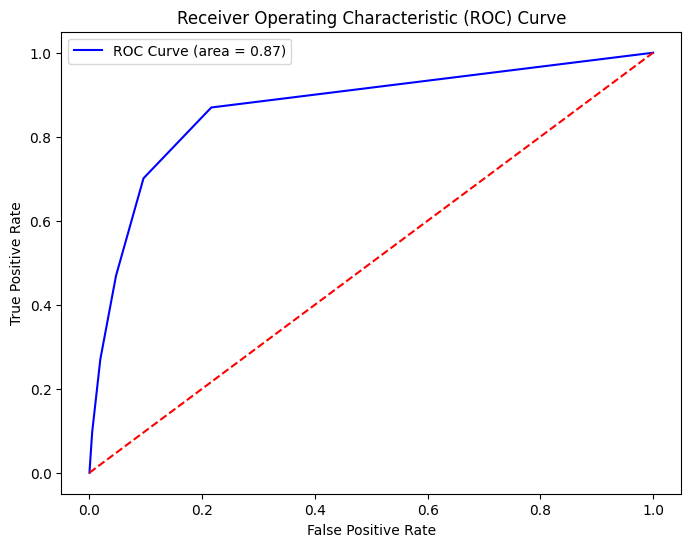

In [ ]:
# ROC Curve and AUC:

y_prob = knn.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:")
print(roc_auc)

# Plotting ROC Curve:

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
# Creating a DataFrame for inspection:

inspection = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Probability': y_prob
})

# Displaying the last 10 rows:
inspection.tail(10)

Actual  Predicted  Probability
9653        0          1          0.6
17297       1          0          0.0
11069       0          0          0.4
9859        0          0          0.0
22155       1          1          1.0
13490       0          0          0.4
1240        0          0          0.0
20306       0          0          0.0
21533       1          0          0.2
1415        1          1          0.8

## Finding the best threshold

In [ ]:
# Finding the best threshold based on ACCURACY:
accuracy = []
for threshold in thresholds:
    y_pred_t = [1 if prob >= threshold else 0 for prob in y_prob]
    accuracy.append(accuracy_score(y_test, y_pred_t))
best_threshold = thresholds[accuracy.index(max(accuracy))]

print(best_threshold)

0.4


In [ ]:
# Finding the best threshold based on F1 SCORE:
f1 = []
for threshold in thresholds:
    y_pred_t = [1 if prob >= threshold else 0 for prob in y_prob]
    f1.append(f1_score(y_test, y_pred_t))
best_threshold = thresholds[f1.index(max(f1))]

print(best_threshold)

0.4


In [ ]:
# Getting predicted probabilities for best threshold:
y_pred_best = (y_prob >= best_threshold).astype(bool)

print(y_pred_best)


[False False False ... False False  True]


In [ ]:
# Printing confusion matrix and classification report for the best threshold:
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


[[5064  537]
 [ 383  898]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      5601
           1       0.63      0.70      0.66      1281

    accuracy                           0.87      6882
   macro avg       0.78      0.80      0.79      6882
weighted avg       0.87      0.87      0.87      6882



In [ ]:
# Printing the confusion matrix and classification_report for y_pred again:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5337  264]
 [ 680  601]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5601
           1       0.69      0.47      0.56      1281

    accuracy                           0.86      6882
   macro avg       0.79      0.71      0.74      6882
weighted avg       0.85      0.86      0.85      6882



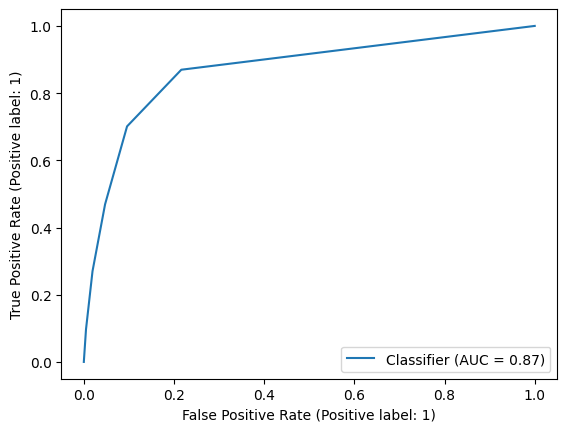

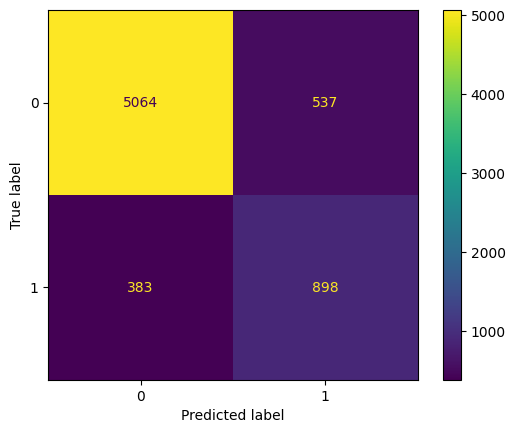

In [ ]:
#Displaying RocCurve and Confusion Matrix:
RocCurveDisplay.from_predictions(y_test, y_prob)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best)
plt.show()

## Plotting the best threshold to visualise it

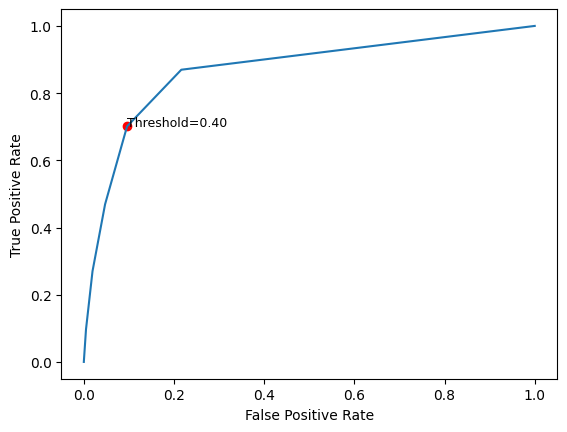

In [ ]:
# Computing the ROC curve:
fpr, tpr, roc_thresholds = roc_curve(y_test, y_prob)

# Finding the index of the threshold that corresponds to the best threshold:
best_threshold_idx = (abs(roc_thresholds - best_threshold)).argmin()

# Plotting the ROC curve:
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.scatter(fpr[best_threshold_idx], tpr[best_threshold_idx], color='red') # Mark the best threshold
plt.text(fpr[best_threshold_idx], tpr[best_threshold_idx], f'Threshold={best_threshold:.2f}', fontsize=9)
plt.show()


## Model Comparison

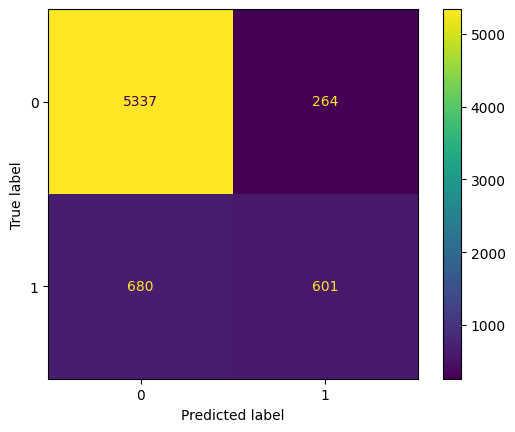

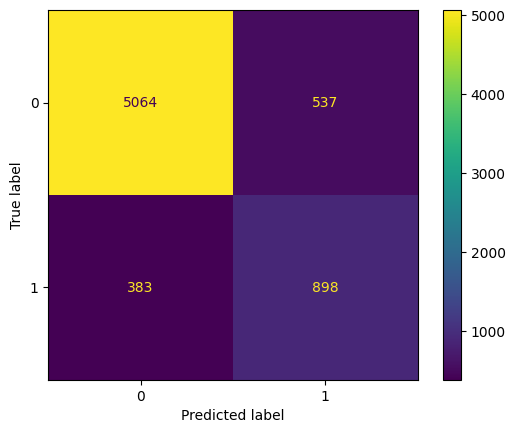

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best)
plt.show()

In [ ]:
#Model evaluation:
print("Accuracy: ", '%.3f' % accuracy_score(y_test, y_pred))
print("Precision: ", '%.3f' % precision_score(y_test, y_pred))
print("Recall: ", '%.3f' % recall_score(y_test, y_pred))
print("F1: ", '%.3f' % f1_score(y_test, y_pred))

Accuracy:  0.863
Precision:  0.695
Recall:  0.469
F1:  0.560


In [ ]:
# Model evaluation for y_pred_best:
print("Accuracy: ", '%.3f' % accuracy_score(y_test, y_pred_best))
print("Precision: ", '%.3f' % precision_score(y_test, y_pred_best))
print("Recall: ", '%.3f' % recall_score(y_test, y_pred_best))
print("F1: ", '%.3f' % f1_score(y_test, y_pred_best))

Accuracy:  0.866
Precision:  0.626
Recall:  0.701
F1:  0.661


## Optimising k

**Optimising k based on Accuracy**

Best k value: 17
Best accuracy: 0.869
F1 score for best accuracy: 0.553


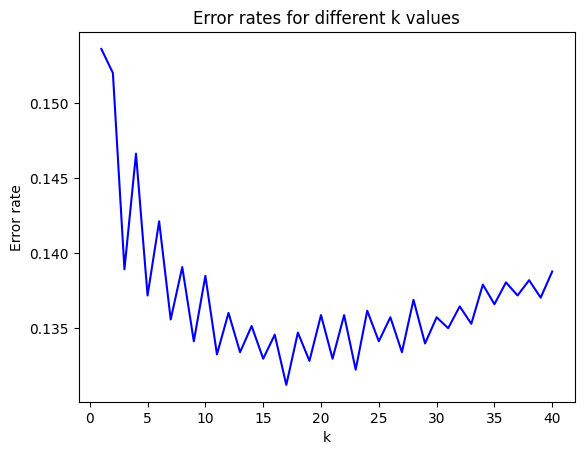

In [ ]:
# Defining a list of k values to test:
k_values = list(range(1, 41))

# Training and evaluating KNN classifiers with different k values:
best_k = 0
best_accuracy = 0
best_f1 = 0
accuracy_scores = []
error_rates = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_k)
    accuracy_scores.append(accuracy)
    error_rates.append(1 - accuracy)
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy
        best_f1 = f1_score(y_test, y_pred_k)

# Finding the best k value with highest accuracy score:
print(f"Best k value: {best_k}")
print(f"Best accuracy: {best_accuracy:.3f}")
print(f"F1 score for best accuracy: {best_f1:.3f}")

# Plotting k values against error rates:
plt.xlabel('k')
plt.ylabel('Error rate')
plt.title('Error rates for different k values')
plt.plot(k_values, error_rates, color='blue')
plt.show()


**Optimising k based on f1_score**


Best k value: 3
Best F1 score: 0.573
Accuracy for Best F1 score: 0.861


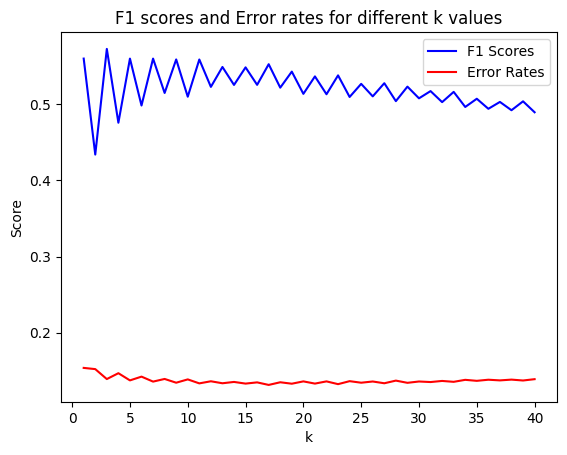

In [ ]:
# Define a list of k values to test
k_values = list(range(1, 41))

# Train and evaluate KNN classifiers with different k values
best_k = 0
best_f1 = 0
best_accuracy = 0
f1_scores = []
error_rates = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    f1 = f1_score(y_test, y_pred_k)
    f1_scores.append(f1)
    accuracy_k = accuracy_score(y_test, y_pred_k)
    error_rates.append(1 - accuracy_k)
    if f1 > best_f1:
        best_k = k
        best_f1 = f1
        best_accuracy = accuracy_k

# Find the best k value with highest F1 score
print(f"Best k value: {best_k}")
print(f"Best F1 score: {best_f1:.3f}")
print(f"Accuracy for Best F1 score: {best_accuracy:.3f}")

# Plot k values against F1 scores and error rates
plt.xlabel('k')
plt.ylabel('Score')
plt.title('F1 scores and Error rates for different k values')
plt.plot(k_values, f1_scores, color='blue', label='F1 Scores')
plt.plot(k_values, error_rates, color='red', label='Error Rates')
plt.legend()
plt.show()


## Cross Validation

**10-fold cross-validation**

In [ ]:
# Assuming knn_bestk is the best kNN model with the optimal number of neighbors
knn_bestk = KNeighborsClassifier(n_neighbors=best_k, p=2)

def get_95ci(scores):
    return 1.96 * scores.std() / np.sqrt(len(scores))

# Performing a 10-fold cross-validation:
accuracy = cross_val_score(knn_bestk, X, y, cv=10)
f1 = cross_val_score(knn_bestk, X, y, cv=10, scoring='f1')

# Printing the mean accuracy scores and 95%CI of the scores:
print("Accuracy scores: %0.3f (+/- %0.3f)" % (accuracy.mean(), get_95ci(accuracy)))

# Printing the mean F1 scores and 95%CI of the scores:
print("F1 scores: %0.3f (+/- %0.3f)" % (f1.mean(), get_95ci(f1)))


Accuracy scores: 0.845 (+/- 0.002)
F1 scores: 0.541 (+/- 0.006)


# **2. Decision Tree Classifier**

## Base DT

In [ ]:
# Creating Decision Tree classifier object:
base_clf = DecisionTreeClassifier(random_state=2024)

# Training Decision Tree Classifier:
base_clf = base_clf.fit(X_train, y_train)

# Predicting the response for test dataset:
y_pred_base = base_clf.predict(X_test)

In [ ]:
# Printing confusion matrix and classification report:
print(confusion_matrix(y_test, y_pred_base))
print(classification_report(y_test, y_pred_base))

[[5141  460]
 [ 473  808]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      5601
           1       0.64      0.63      0.63      1281

    accuracy                           0.86      6882
   macro avg       0.78      0.77      0.78      6882
weighted avg       0.86      0.86      0.86      6882



In [ ]:
# Calculating performance metrics for the base Decision Tree:
accuracy_no_pruning = accuracy_score(y_test, y_pred_base)
precision_no_pruning = precision_score(y_test, y_pred_base)
recall_no_pruning = recall_score(y_test, y_pred_base)
f1_no_pruning = f1_score(y_test, y_pred_base)

print('DT without pruning: ')
print('Accuracy: ', '%.2f' % accuracy_no_pruning)
print('Precision: ', '%.2f' % precision_no_pruning)
print('Recall: ', '%.2f' % recall_no_pruning)
print('F1 score: ', '%.2f' % f1_no_pruning)


DT without pruning: 
Accuracy:  0.86
Precision:  0.64
Recall:  0.63
F1 score:  0.63


## Pre Prune DT

In [ ]:
# Creating Decision Tree classifier object with pre-pruning:
pre_pruned_clf = DecisionTreeClassifier(max_depth=15, max_features='sqrt', criterion='entropy', splitter='best', max_leaf_nodes=10, random_state=2024)

# Training Decision Tree Classifier:
pre_pruned_clf = pre_pruned_clf.fit(X_train, y_train)

# Predicting the response for test dataset:
y_pred_pre_pruned = pre_pruned_clf.predict(X_test)


In [ ]:
# Printing confusion matrix and classification report for the pre-pruned Decision Tree:
print(confusion_matrix(y_test, y_pred_pre_pruned))
print(classification_report(y_test, y_pred_pre_pruned))

[[5176  425]
 [ 641  640]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      5601
           1       0.60      0.50      0.55      1281

    accuracy                           0.85      6882
   macro avg       0.75      0.71      0.73      6882
weighted avg       0.84      0.85      0.84      6882



In [ ]:
# Calculating performance metrics for pre-pruned Decision Tree
accuracy_pre_pruned = accuracy_score(y_test, y_pred_pre_pruned)
precision_pre_pruned = precision_score(y_test, y_pred_pre_pruned)
recall_pre_pruned = recall_score(y_test, y_pred_pre_pruned)
f1_pre_pruned = f1_score(y_test, y_pred_pre_pruned)

print('DT pre pruned: ')
print('Accuracy: ', '%.2f' % accuracy_pre_pruned)
print('Precision: ', '%.2f' % precision_pre_pruned)
print('Recall: ', '%.2f' % recall_pre_pruned)
print('F1 score: ', '%.2f' % f1_pre_pruned)

DT pre pruned: 
Accuracy:  0.85
Precision:  0.60
Recall:  0.50
F1 score:  0.55


## Post Prune DT

In [ ]:
# Post-prune the decision tree:
path = base_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas  #ccp_alpha = 0 by default, minimal cost-complexity pruning is an algorithm used to prune a tree to avoid over-fitting.
ccp_alphas = ccp_alphas[:-1]  # Remove the maximum alpha
decision_trees = []

for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(max_depth=20, criterion='entropy', max_leaf_nodes=20, random_state=2024, ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    decision_trees.append(dt)

# Finding the decision tree with the highest recall on the validation data:
recall_scores = [recall_score(y_test, dt.predict(X_test)) for dt in decision_trees]
post_pruned_clf = decision_trees[recall_scores.index(max(recall_scores))]

# Making predictions on the testing data using the best decision tree:
y_pred_post_pruned = post_pruned_clf.predict(X_test)


In [ ]:
# Printing confusion matrix and classification report for the post-pruned Decision Tree:
print(confusion_matrix(y_test, y_pred_post_pruned))
print(classification_report(y_test, y_pred_post_pruned))

[[5092  509]
 [ 312  969]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      5601
           1       0.66      0.76      0.70      1281

    accuracy                           0.88      6882
   macro avg       0.80      0.83      0.81      6882
weighted avg       0.89      0.88      0.88      6882



In [ ]:
# Calculating performance metrics for post-pruned Decision Tree:
accuracy_post_pruned = accuracy_score(y_test, y_pred_post_pruned)
precision_post_pruned = precision_score(y_test, y_pred_post_pruned)
recall_post_pruned = recall_score(y_test, y_pred_post_pruned)
f1_post_pruned = f1_score(y_test, y_pred_post_pruned)

print('DT post pruning: ')
print('Accuracy: ', '%.2f' % accuracy_post_pruned)
print('Precision: ', '%.2f' % precision_post_pruned)
print('Recall: ', '%.2f' % recall_post_pruned)
print('F1 score: ', '%.2f' % f1_post_pruned)


DT post pruning: 
Accuracy:  0.88
Precision:  0.66
Recall:  0.76
F1 score:  0.70


## Model Comparison

In [ ]:
# Base DT get predicted probabilities for the main class:
y_pred_probs_base = base_clf.predict_proba(X_test)
y_pred_probs_base = y_pred_probs_base[:, 1]

# Pre-pruned DT get predicted probabilities for the main class:
y_pred_probs_pre = pre_pruned_clf.predict_proba(X_test)
y_pred_probs_pre = y_pred_probs_pre[:, 1]

# Post-pruned DT get predicted probabilities for the main class:
y_pred_probs_post = post_pruned_clf.predict_proba(X_test)
y_pred_probs_post = y_pred_probs_post[:, 1]


In [ ]:
# Base DT ROC curve and AUC:
fpr_base, tpr_base, thresholds_base = roc_curve(y_test, y_pred_probs_base)
auc_base = auc(fpr_base, tpr_base)

# Pre-pruned DT ROC curve and AUC:
fpr_pre_pruned, tpr_pre_pruned, thresholds_pre_pruned = roc_curve(y_test, y_pred_probs_pre)
auc_pre_pruned = auc(fpr_pre_pruned, tpr_pre_pruned)

# Post-pruned DT ROC curve and AUC:
fpr_post_pruned, tpr_post_pruned, thresholds_post_pruned = roc_curve(y_test, y_pred_probs_post)
auc_post_pruned = auc(fpr_post_pruned, tpr_post_pruned)


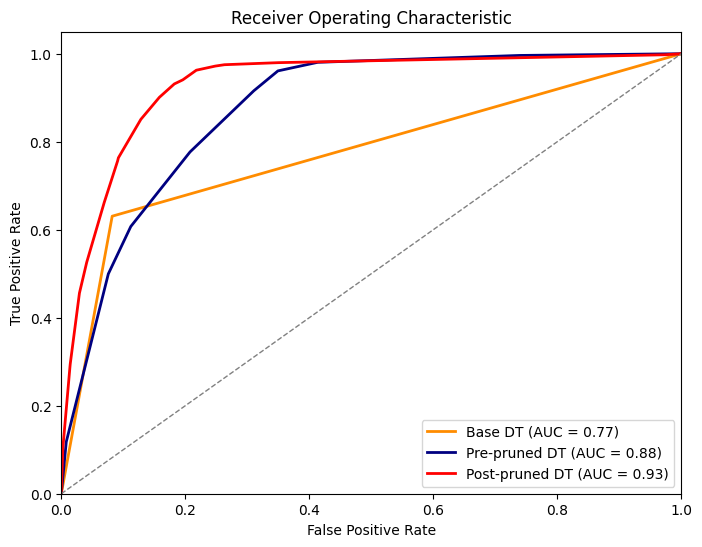

Base DT AUC: 0.77
Pre-pruned DT AUC: 0.88
Post-pruned DT AUC: 0.93


In [ ]:
# Plotting ROC curves:
plt.figure(figsize=(8, 6))
plt.plot(fpr_base, tpr_base, color='darkorange', lw=2, label='Base DT (AUC = %0.2f)' % auc_base)
plt.plot(fpr_pre_pruned, tpr_pre_pruned, color='navy', lw=2, label='Pre-pruned DT (AUC = %0.2f)' % auc_pre_pruned)
plt.plot(fpr_post_pruned, tpr_post_pruned, color='red', lw=2, label='Post-pruned DT (AUC = %0.2f)' % auc_post_pruned)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Computing and printing AUC:
print('Base DT AUC:', '%.2f' % auc_base)
print('Pre-pruned DT AUC:', '%.2f' % auc_pre_pruned)
print('Post-pruned DT AUC:', '%.2f' % auc_post_pruned)


In [ ]:
#Printing confusion matrix for the base DT:
print(confusion_matrix(y_test, y_pred_base))
print(classification_report(y_test, y_pred_base))

[[5141  460]
 [ 473  808]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      5601
           1       0.64      0.63      0.63      1281

    accuracy                           0.86      6882
   macro avg       0.78      0.77      0.78      6882
weighted avg       0.86      0.86      0.86      6882



In [ ]:
#Printing confusion matrix for the pre-pruned DT:
print(confusion_matrix(y_test, y_pred_pre_pruned))
print(classification_report(y_test, y_pred_pre_pruned))

[[5176  425]
 [ 641  640]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      5601
           1       0.60      0.50      0.55      1281

    accuracy                           0.85      6882
   macro avg       0.75      0.71      0.73      6882
weighted avg       0.84      0.85      0.84      6882



In [ ]:
#Printing confusion matrix for the post_pruned DT:
print(confusion_matrix(y_test, y_pred_post_pruned))
print(classification_report(y_test, y_pred_post_pruned))

[[5092  509]
 [ 312  969]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      5601
           1       0.66      0.76      0.70      1281

    accuracy                           0.88      6882
   macro avg       0.80      0.83      0.81      6882
weighted avg       0.89      0.88      0.88      6882



In [ ]:
# Extracting the base decision rules:
rules = export_text(base_clf, feature_names=X.columns.tolist())
print(rules)

|--- RBA Cash Rate <= -1.26
|   |--- Last Contact Duration <= -0.41
|   |   |--- Last Contact Duration <= -0.55
|   |   |   |--- Previous Campaign Outcome <= 1.46
|   |   |   |   |--- Employment Variation Rate <= -1.96
|   |   |   |   |   |--- Age <= -0.89
|   |   |   |   |   |   |--- Last Contact Duration <= -0.66
|   |   |   |   |   |   |   |--- Last Contact Weekday <= 1.06
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Last Contact Weekday >  1.06
|   |   |   |   |   |   |   |   |--- Number of Previous Campaign Calls <= 0.55
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- Number of Previous Campaign Calls >  0.55
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Last Contact Duration >  -0.66
|   |   |   |   |   |   |   |--- Number of Current Campaign Calls <= -0.39
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Number of Current Campaign Calls >  -0.39

In [ ]:
# Extracting the pre-pruned decision rules:
rules_pre_pruned = export_text(pre_pruned_clf, feature_names=X.columns.tolist())
print(rules_pre_pruned)

|--- Last Contact Direction <= 0.31
|   |--- Last Contact Duration <= -0.11
|   |   |--- Employment Variation Rate <= -0.38
|   |   |   |--- Last Contact Duration <= -0.62
|   |   |   |   |--- class: 0
|   |   |   |--- Last Contact Duration >  -0.62
|   |   |   |   |--- Previous Campaign Outcome <= 1.46
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Previous Campaign Outcome >  1.46
|   |   |   |   |   |--- class: 1
|   |   |--- Employment Variation Rate >  -0.38
|   |   |   |--- class: 0
|   |--- Last Contact Duration >  -0.11
|   |   |--- Last Contact Month <= 1.39
|   |   |   |--- Employment Variation Rate <= -0.35
|   |   |   |   |--- class: 1
|   |   |   |--- Employment Variation Rate >  -0.35
|   |   |   |   |--- class: 0
|   |   |--- Last Contact Month >  1.39
|   |   |   |--- class: 1
|--- Last Contact Direction >  0.31
|   |--- Last Contact Duration <= 0.68
|   |   |--- RBA Cash Rate <= 0.75
|   |   |   |--- class: 0
|   |   |--- RBA Cash Rate >  0.75
|   |   |   |--- 

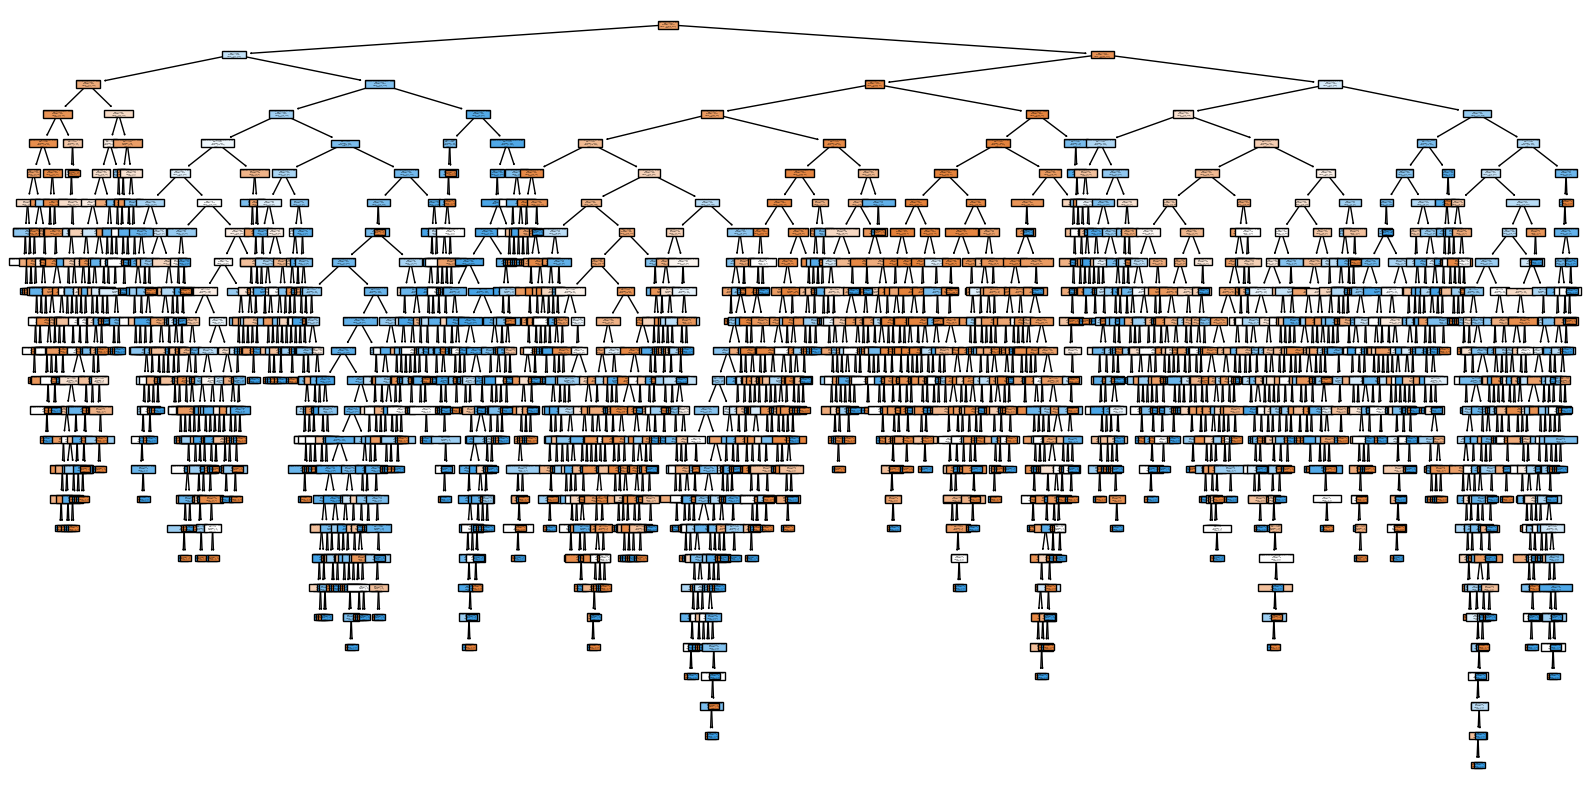

In [ ]:
# Visualising the base decision tree:
plt.figure(figsize=(20,10))
plot_tree(base_clf, filled=True, feature_names=X.columns.tolist(), class_names=['0', '1'])
plt.show()

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

from six import StringIO
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [ ]:
# Visualising the decision tree:
dot_data = StringIO()
export_graphviz(base_clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=X.columns.tolist(), class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('GOBank_base_DT.png')
Image(graph.create_png())

Output hidden; open in https://colab.research.google.com to view.

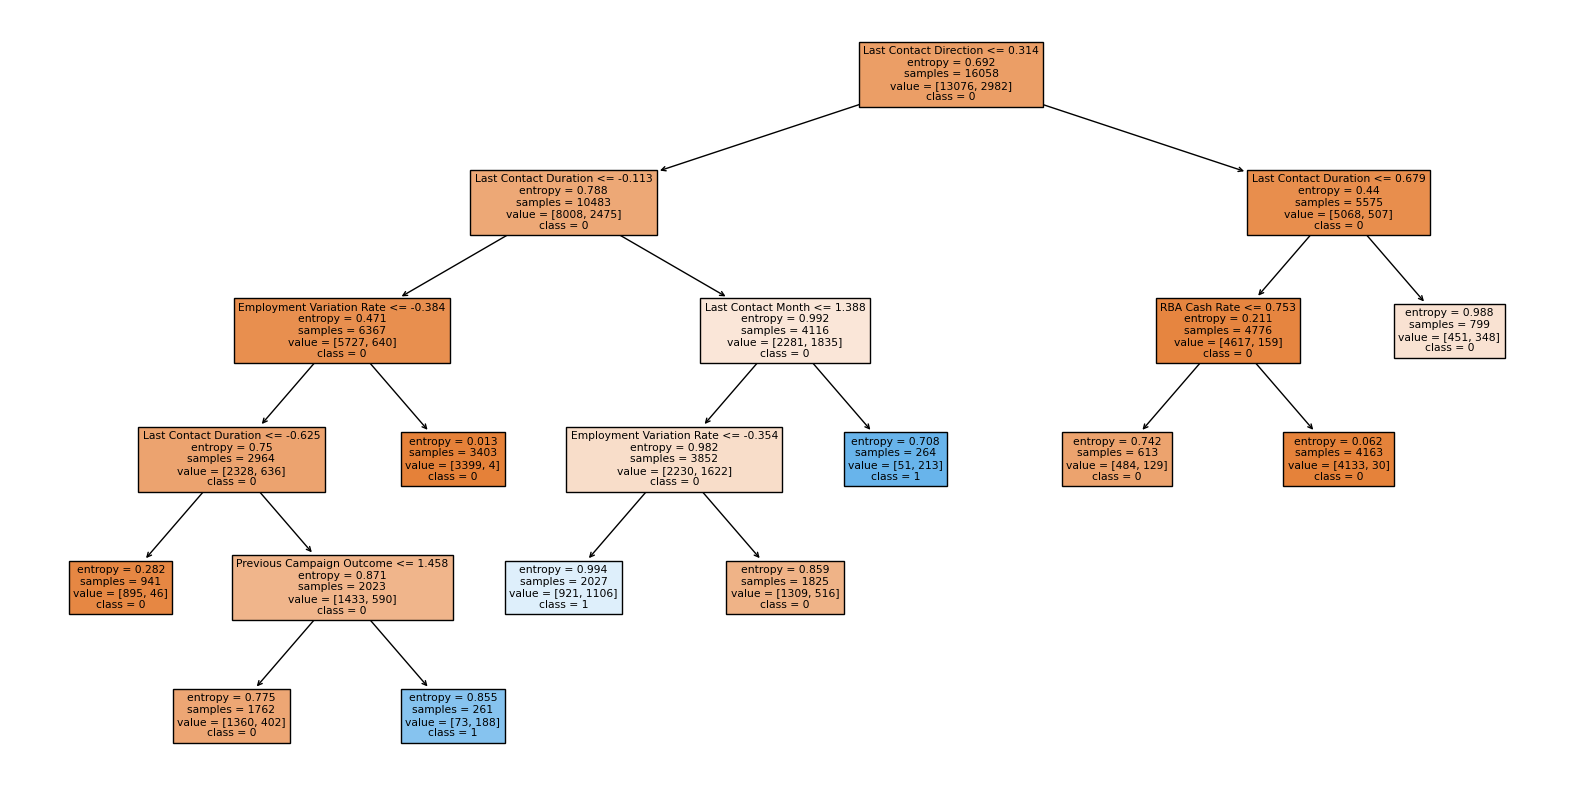

In [ ]:
# Visualising the pre-pruned decision tree:
plt.figure(figsize=(20,10))
plot_tree(pre_pruned_clf, filled=True, feature_names=X.columns.tolist(), class_names=['0', '1'])
plt.show()

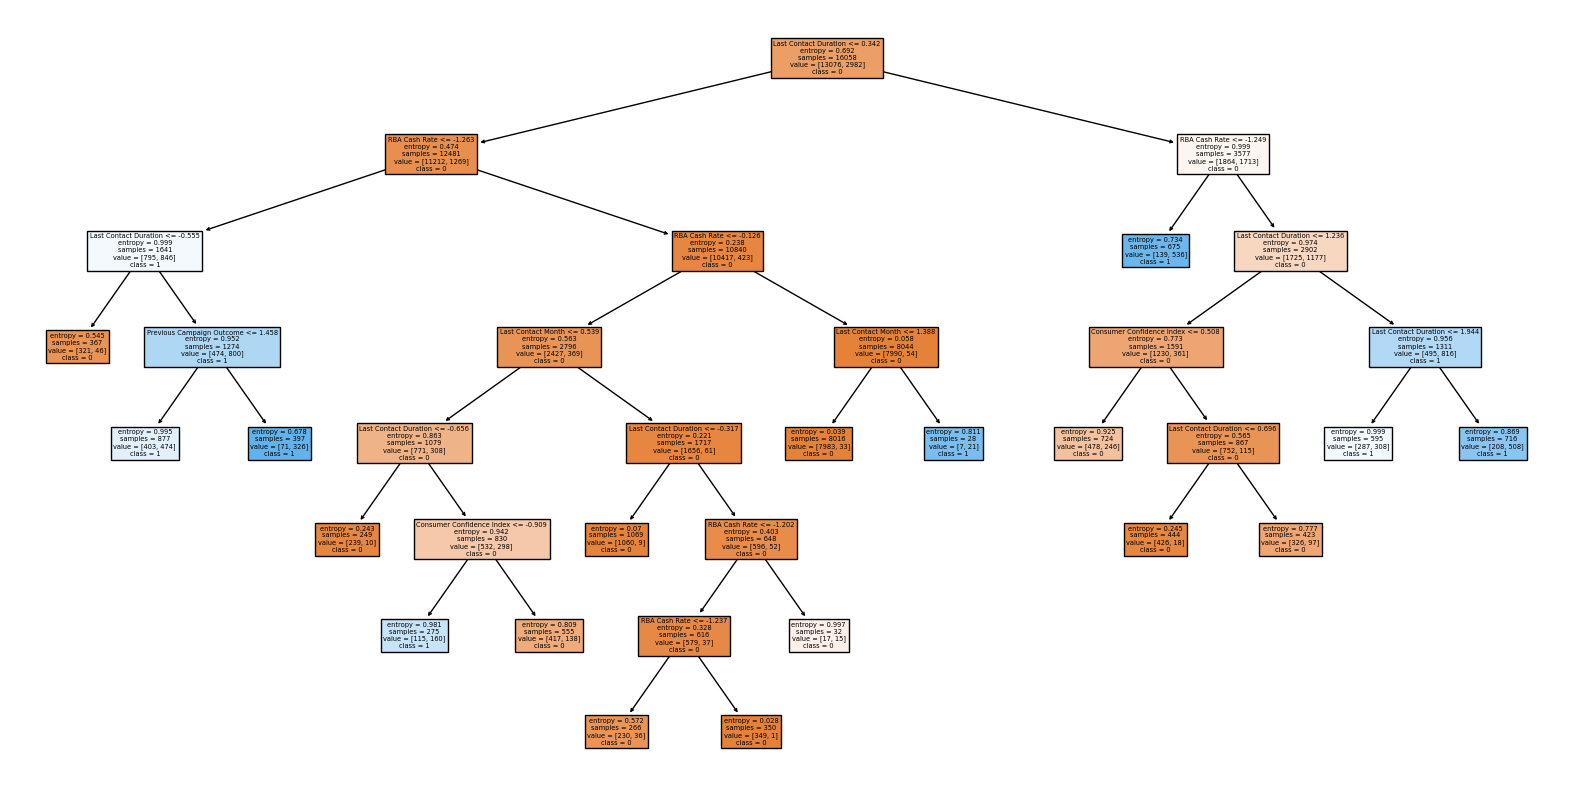

In [ ]:
# Visualising the post-pruned decision tree:
plt.figure(figsize=(20,10))
plot_tree(post_pruned_clf, filled=True, feature_names=X.columns.tolist(), class_names=['0', '1'])
plt.show()

## Cross Validation

**K-fold cross validation**

We use the t-distribution to calculate the confidence interval because the distribution of the cross-validation scores may not be perfectly normal. The t-distribution is similar to the normal distribution but has fatter tails, which makes it more appropriate for small sample sizes.

In [ ]:
# Calculating 95% confidence interval of the mean F1 score:
def get_95ci(metric):
    n = len(metric)
    se = metric.std() / np.sqrt(n)
    t = 2.262  # t-value for 95% CI and n-1 degrees of freedom, 10 folders
    ci = t * se
    return ci

In [ ]:
# Performing 10-fold cross-validation:
accuracy = cross_val_score(post_pruned_clf, X, y, cv=10)
f1 = cross_val_score(post_pruned_clf, X, y, cv=10, scoring='f1')

# Printing the mean accuracy scores and 95%CI of the scores:
print("Accuracy scores: %0.3f (+/- %0.3f)" % (accuracy.mean(), get_95ci(accuracy)))
# Printing the mean F1 scores and 95%CI of the scores:
print("F1 scores: %0.3f (+/- %0.3f)" % (f1.mean(), get_95ci(f1)))

Accuracy scores: 0.881 (+/- 0.005)
F1 scores: 0.696 (+/- 0.014)


In [ ]:
# Calculating 95% confidence interval of the mean accuracy score:
accuracy_ci = get_95ci(accuracy)
accuracy_ci

0.005467114662325007

In [ ]:
accuracy

array([0.89668701, 0.8788143 , 0.89014821, 0.8788143 , 0.88055798,
       0.88491718, 0.8722755 , 0.87532694, 0.87925022, 0.8700959 ])

In [ ]:
f1

array([0.73754153, 0.70235546, 0.70422535, 0.70362473, 0.70410367,
       0.70337079, 0.65730994, 0.68640351, 0.68342857, 0.67887931])

## Ensemble Learning for Classification

**Bootstrap Aggregation**

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
# Creating the base classifier:
base_clf = DecisionTreeClassifier(max_depth=10, criterion="entropy", max_leaf_nodes=10, random_state=2024)

# Defining the ensemble classifier using bagging:
ensemble_classifier = BaggingClassifier(estimator=base_clf, n_estimators=100, random_state=2024)

# Training the ensemble classifier on the training data:
ensemble_classifier.fit(X_train, y_train)

# Making predictions on the testing data:
y_pred_baggedtrees = ensemble_classifier.predict(X_test)

In [ ]:
# Printing confusion matrix and classification report for the bagged trees ensemble classifier:
print(confusion_matrix(y_test, y_pred_baggedtrees))
print(classification_report(y_test, y_pred_baggedtrees))

[[5217  384]
 [ 432  849]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      5601
           1       0.69      0.66      0.68      1281

    accuracy                           0.88      6882
   macro avg       0.81      0.80      0.80      6882
weighted avg       0.88      0.88      0.88      6882



# Comparing our 2 best models

kNN Best Threshold Metrics:
Accuracy: 0.871
Precision: 0.716
Recall: 0.512
F1 Score: 0.597

Decision Tree Post-Pruned Metrics:
Accuracy: 0.881
Precision: 0.656
Recall: 0.756
F1 Score: 0.702


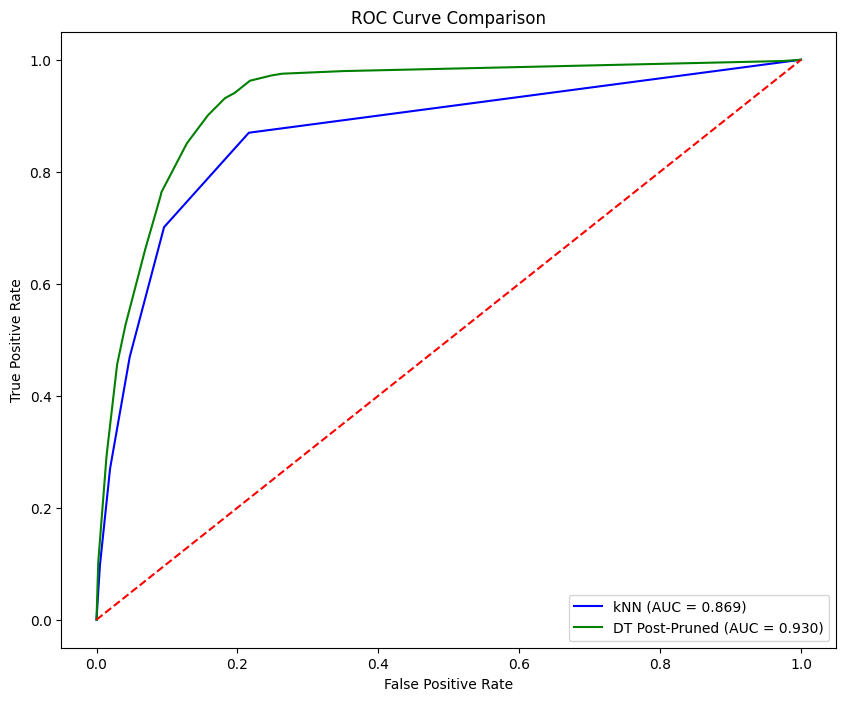

In [ ]:
# Comparing kNN (Best Threshold) and Decision Tree (Post-Pruned):

# kNN best threshold evaluation:
knn_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_best),
    'Precision': precision_score(y_test, y_pred_best),
    'Recall': recall_score(y_test, y_pred_best),
    'F1 Score': f1_score(y_test, y_pred_best)
}

print("kNN Best Threshold Metrics:")
for metric, value in knn_metrics.items():
    print(f"{metric}: {value:.3f}")

# Decision Tree post-pruned evaluation
dt_post_pruned_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_post_pruned),
    'Precision': precision_score(y_test, y_pred_post_pruned),
    'Recall': recall_score(y_test, y_pred_post_pruned),
    'F1 Score': f1_score(y_test, y_pred_post_pruned)
}

print("\nDecision Tree Post-Pruned Metrics:")
for metric, value in dt_post_pruned_metrics.items():
    print(f"{metric}: {value:.3f}")

# Plotting ROC Curves for comparison:
plt.figure(figsize=(10, 8))

# ROC for kNN:
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob)
plt.plot(fpr_knn, tpr_knn, color='blue', label=f'kNN (AUC = {roc_auc_score(y_test, y_prob):.3f})')

# ROC for Decision Tree Post-Pruned:
y_prob_post_pruned = post_pruned_clf.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_post_pruned)
plt.plot(fpr_dt, tpr_dt, color='green', label=f'DT Post-Pruned (AUC = {roc_auc_score(y_test, y_prob_post_pruned):.3f})')

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


## Images for kNN (best threshold):

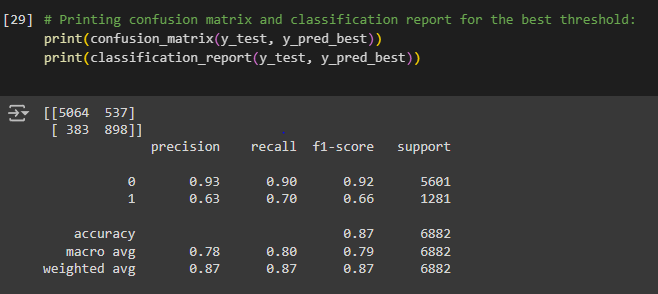

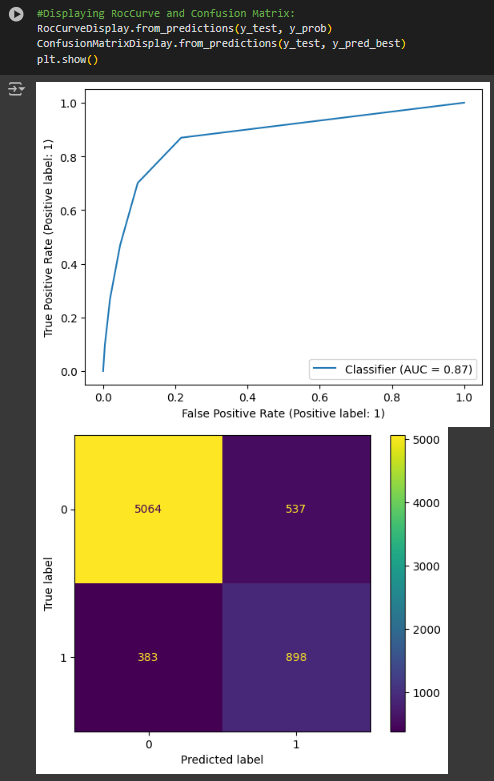

## Image for Decision Tree (Post-Pruned)

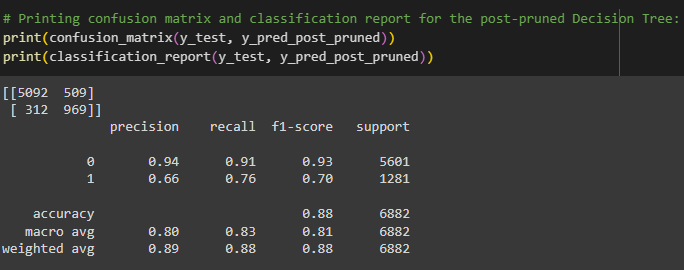

# **3. k-Means Clustering**

In [ ]:
# Fitting K-means clustering model with a 'guessed' number of clusters:
k = 5
kmeans = KMeans(n_clusters=k, n_init='auto', max_iter=300, random_state=2024)

# Fitting kmeans with X_scaled:
kmeans.fit(X_scaled)

# Adding cluster labels to original dataset:
df['Cluster'] = kmeans.labels_

## Cluster Evaluation

**Within-Cluster Sum of Squares (WCSS)**

In [ ]:
# Evaluating the model using within-cluster sum of squares (WCSS):
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", '%.3f' % wcss)

Within-Cluster Sum of Squares (WCSS): 277358.311


**The Davies-Bouldin Index (DBI)**

In [ ]:
# Computing the Davies-Bouldin index:
dbs = davies_bouldin_score(X_scaled, kmeans.labels_)
print("Davies-Bouldin index:", '%.3f' % dbs)

Davies-Bouldin index: 2.681


**Silhouette score**

In [ ]:
# Computing the Silhouette score for the clustering model:
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)

print('Silhouette score:', '%.3f' % silhouette_avg)

# Below 0.5: clustering is poor.

Silhouette score: 0.103


In [ ]:
# Fitting KMeans with X_scaled to get labels:
cluster_labels = kmeans.fit_predict(X_scaled)

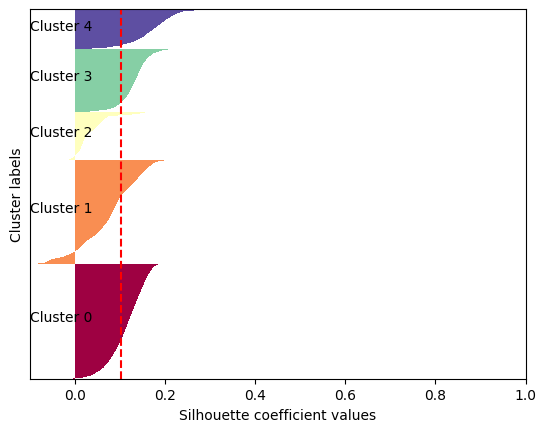

In [ ]:
# Computing silhouette scores:
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

# Plotting silhouette diagram:
n_clusters = 5
fig, ax = plt.subplots()
y_lower, y_upper = 0, 0

# Defining the colormap, options include: autumn, Spectral, viridis, plasma, cool, jet:
cmap = cm.Spectral

# Creating a list of evenly spaced values in the range [0, 1]:
values = np.linspace(0, 1, n_clusters)

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper += size_cluster_i
    color = cmap(values[i])
    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1.0,
            edgecolor='none', color=color)
    ax.text(-0.1, (y_lower + y_upper) / 2, 'Cluster ' + str(i), color='black', fontsize=10)
    y_lower += size_cluster_i

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster labels")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

plt.show()

## Optimising k

**Elbow method based on the SSE (WCSS) Score**

In [ ]:
# Determining optimal number of clusters using the SSE metric:
sse_scores = []
best_k = 2
best_sse_score = 4622.613
for i in range(2, 41):
    kmeans = KMeans(n_clusters=i, n_init='auto', random_state=2024)
    kmeans.fit(X_scaled)
    sse_score_i = kmeans.inertia_
    sse_scores.append(sse_score_i)
    if best_sse_score > sse_score_i:
        best_k = i
        best_sse_score = sse_score_i

print('Best k: ', best_k)
print('Best within cluster sum of squared error score: ', '%.3f' % best_sse_score)

Best k:  2
Best within cluster sum of squared error score:  4622.613


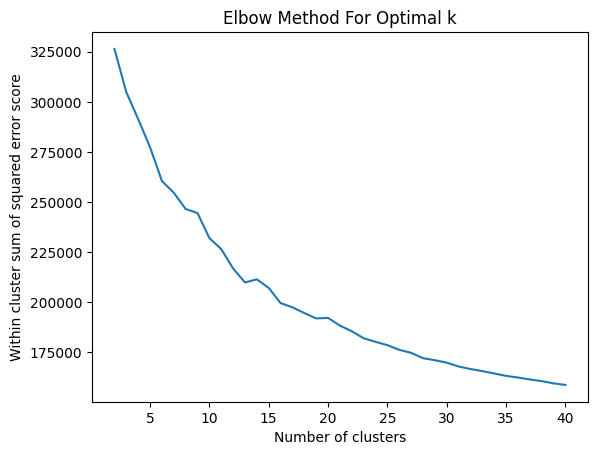

In [ ]:
# Plotting the SSE scores to determine optimal number of clusters:
plt.plot(range(2, 41), sse_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Within cluster sum of squared error score")
plt.title("Elbow Method For Optimal k")
plt.show()

As k increases, clusters become smaller hence WCSS becomes smaller. Thus, WCSS along is not a good metric.

**Optimising the number of clusters based on Davies Bouldin Score (DBI)**

In [ ]:
# Determining optimal number of clusters using the Davies-Bouldin index:
dbs_scores = []
best_k = 3
best_dbs_score = 1
for k in range(2, 41):
    kmeans = KMeans(n_clusters=k, n_init='auto', max_iter=300, random_state=2024)
    kmeans.fit(X_scaled)
    dbs_score_k = davies_bouldin_score(X_scaled, kmeans.labels_)
    dbs_scores.append(dbs_score_k)
    if best_dbs_score > dbs_score_k:
        best_k = k
        best_dbs_score = dbs_score_k

print('Best k: ', best_k)
print('Best Davies-Bouldin index: ', '%.3f' % best_dbs_score)


Best k:  3
Best Davies-Bouldin index:  1.000


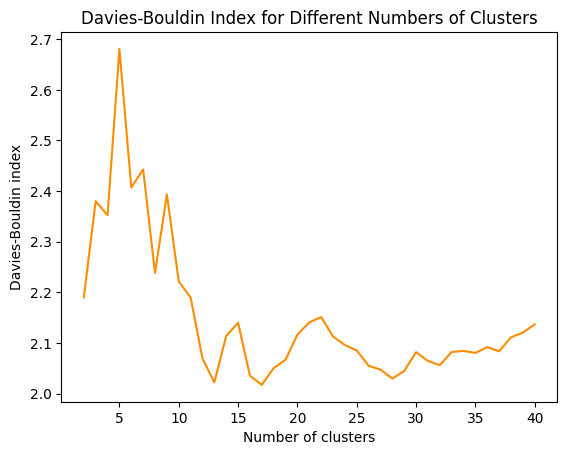

In [ ]:
# Plot the Davies-Bouldin indices to determine optimal number of clusters:
plt.plot(range(2, 41), dbs_scores, color='darkorange', label='Davies-Bouldin index')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin index')
plt.title('Davies-Bouldin Index for Different Numbers of Clusters')
plt.show()

**Optimising the number of clusters based on Silhouette Score**

In [ ]:
# Determining the optimal number of clusters using silhouette score:
sil_scores = []
best_k = 2
best_sil_score = 0
for i in range(2, 41):
    kmeans = KMeans(n_clusters=i, n_init='auto', random_state=2024)
    kmeans.fit(X_scaled)
    sil_score_i = silhouette_score(X_scaled, kmeans.labels_)
    sil_scores.append(sil_score_i)
    if best_sil_score < sil_score_i:
        best_k = i
        best_sil_score = sil_score_i

print('Best k: ', best_k)
print('Best silhouette score: ', '%.3f' % best_sil_score)


Best k:  2
Best silhouette score:  0.171


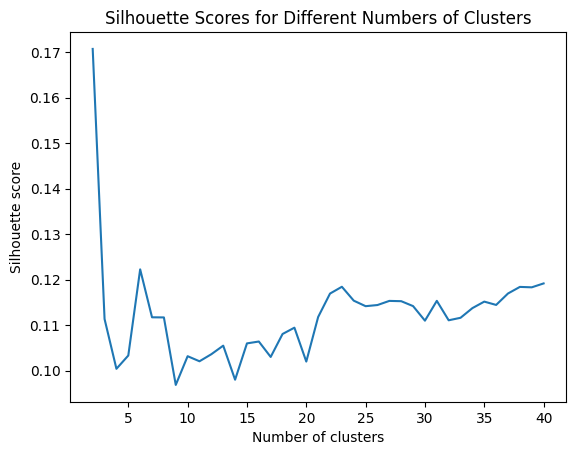

In [ ]:
# Plotting the silhouette scores to determine optimal number of clusters:
plt.plot(range(2, 41), sil_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.show()

**Creating a graph to observe both metrics**

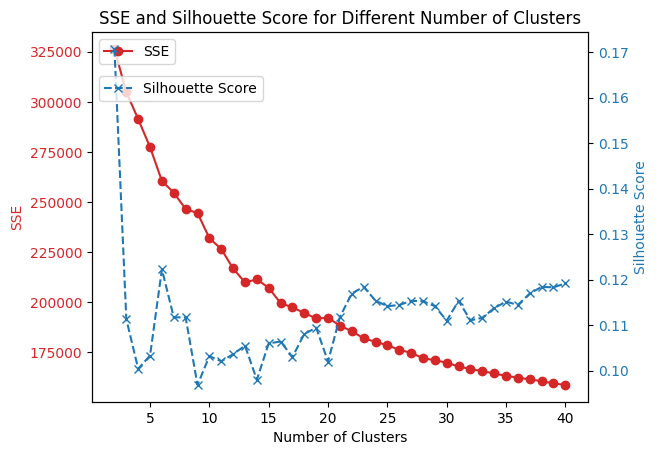

In [ ]:
# Creating a figure and a set of subplots (two y-axes):
fig, ax1 = plt.subplots()

cluster_range = range(2, 41)

# Plotting the SSE:
color = 'tab:red'
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('SSE', color=color)
ax1.plot(cluster_range, sse_scores, marker='o', label='SSE', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating the second y-axis to plot Silhouette Score:
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(cluster_range, sil_scores, marker='x', linestyle='--', label='Silhouette Score', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Displaying legend:
ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0.0, 0.9))

# Displaying plot:
plt.title("SSE and Silhouette Score for Different Number of Clusters")
plt.show()

## Model Selection

**Going with k = 3**

In [ ]:
n_clusters=3

In [ ]:
# Initialising the model object:
kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=2024)

# Fitting K-means clustering model with the selected number of clusters:
kmeans.fit(X_scaled)

KMeans(n_clusters=3, n_init='auto', random_state=2024)

In [ ]:
# Add cluster labels to original dataset
df['Cluster'] = kmeans.labels_

In [ ]:
# Evaluate the model using within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", '%.3f' % wcss)

# Compute the Davies-Bouldin index
dbs = davies_bouldin_score(X_scaled, kmeans.labels_)
print("Davies-Bouldin index:", '%.3f' % dbs)

# Compute the Silhouette score for the clustering model
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print('Silhouette score:', '%.3f' % silhouette_avg)

Within-Cluster Sum of Squares (WCSS): 304826.439
Davies-Bouldin index: 2.380
Silhouette score: 0.111


**Creating the Silhouette Plot**

<ipython-input-90-2f5e8d517c9b>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Spectral")


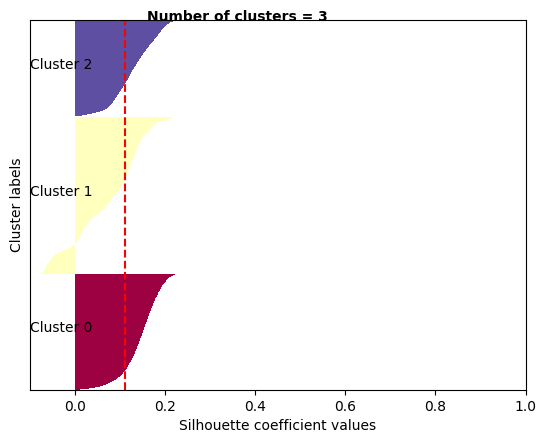

In [ ]:
# Computing sample silhouette scores:
cluster_labels = kmeans.labels_
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

# Creating a color map:
cmap = cm.get_cmap("Spectral")

# Creating a list of evenly spaced values in the range [0, 1]:
values = np.linspace(0, 1, n_clusters)

# Plotting silhouette diagram:
fig, ax = plt.subplots()
y_lower, y_upper = 0, 0
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper += size_cluster_i
    color = cmap(values[i])
    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1.0,
            edgecolor='none', color=color)
    ax.text(-0.1, (y_lower + y_upper) / 2, 'Cluster ' + str(i), color='black', fontsize=10)
    y_lower += size_cluster_i

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster labels")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

ax.text(silhouette_avg + 0.05, len(X_scaled) + 5, "Number of clusters = %d" % n_clusters, fontsize=10, fontweight='bold')

plt.show()

## **Post-analysis for Cluster Profiling**

In [ ]:
df[['Age', 'Last Contact Duration', 'Number of Current Campaign Calls', 'Number of Previous Campaign Calls', 'RBA Cash Rate', 'Employment Variation Rate', 'Consumer Confidence Index', 'Cluster']]


Age  Last Contact Duration  Number of Current Campaign Calls  \
0       32                  172.0                                 2   
1       39                  744.0                                 6   
2       36                   31.0                                 1   
3       44                  102.0                                 1   
4       38                  436.0                                 1   
...    ...                    ...                               ...   
22935   29                  921.0                                 3   
22936   83                   75.0                                 2   
22937   29                  192.0                                 1   
22938   46                 1220.0                                12   
22939   35                  236.0                                 3   

       Number of Previous Campaign Calls  RBA Cash Rate  \
0                                    0.0          4.963   
1                                    0.0          4.857   
2                                    0.0          1.327   
3                                    0.0          1.327   
4                                    0.0          4.860   
...                                  ...            ...   
22935                                0.0          4.964   
22936                                0.0          0.771   
22937                                0.0          1.262   
22938                                0.0          4.961   
22939                                0.0          4.960   

       Employment Variation Rate  Consumer Confidence Index  Cluster  
0                            1.4                     93.918        2  
1                            1.1                     93.994        0  
2                           -1.8                     92.893        1  
3                           -1.8                     92.893        1  
4                            1.1                     93.994        0  
...                          ...                        ...      ...  
22935                        1.4                     93.444        2  
22936                       -3.4                     92.379        1  
22937                       -2.9                     92.963        1  
22938                        1.4                     93.918        2  
22939                        1.4                     93.918        2  

[22940 rows x 8 columns]

In [ ]:
# Counting the clusters
cluster_count = df['Cluster'].value_counts()
print(cluster_count)

Cluster
1    9766
0    7210
2    5964
Name: count, dtype: int64


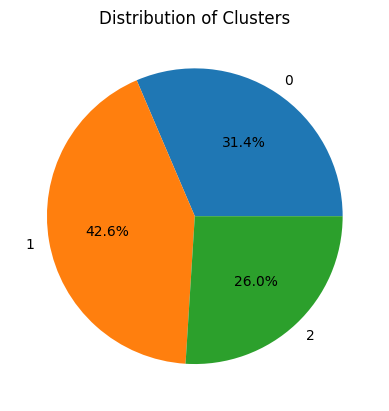

In [ ]:
# Sort the index to ensure the clusters are in order
sorted_cluster_count = cluster_count.sort_index()

# Define colors for the pie chart
colours = sns.color_palette("tab10", n_colors=len(sorted_cluster_count))

# Plot the pie chart
plt.pie(sorted_cluster_count, labels=sorted_cluster_count.index, autopct='%1.1f%%', colors=colours)
plt.title('Distribution of Clusters')
plt.show()

In [ ]:
# Get centroids of the clusters
centroids = kmeans.cluster_centers_

# List of features used in clustering
features = ['Age', 'Last Contact Duration', 'Number of Current Campaign Calls',
            'Number of Previous Campaign Calls', 'RBA Cash Rate',
            'Employment Variation Rate', 'Consumer Confidence Index']

# Display the centroids
for idx, centroid in enumerate(centroids):
    print(f"Cluster {idx} centroid values:")
    for feature, value in zip(features, centroid):
        print(f"  {feature}: {value:.2f}")
    print("\n")

# To identify importance, you can look at the difference between centroids
for idx, feature in enumerate(features):
    print(f"Range for {feature}: {max(centroid[idx] for centroid in centroids) - min(centroid[idx] for centroid in centroids):.2f}")


Cluster 0 centroid values:
  Age: 0.01
  Last Contact Duration: 0.21
  Number of Current Campaign Calls: -0.04
  Number of Previous Campaign Calls: -0.12
  RBA Cash Rate: -0.13
  Employment Variation Rate: -0.00
  Consumer Confidence Index: 0.24


Cluster 1 centroid values:
  Age: -0.01
  Last Contact Duration: -0.08
  Number of Current Campaign Calls: 0.02
  Number of Previous Campaign Calls: 0.11
  RBA Cash Rate: 0.08
  Employment Variation Rate: -0.01
  Consumer Confidence Index: -0.29


Cluster 2 centroid values:
  Age: 0.00
  Last Contact Duration: -0.13
  Number of Current Campaign Calls: 0.02
  Number of Previous Campaign Calls: -0.04
  RBA Cash Rate: 0.03
  Employment Variation Rate: 0.02
  Consumer Confidence Index: 0.18


Range for Age: 0.02
Range for Last Contact Duration: 0.34
Range for Number of Current Campaign Calls: 0.07
Range for Number of Previous Campaign Calls: 0.23
Range for RBA Cash Rate: 0.21
Range for Employment Variation Rate: 0.02
Range for Consumer Confidence

Examining Cluster vs each of other variables

In [ ]:
from sklearn.metrics import mutual_info_score

In [ ]:
# Assuming df is your DataFrame and kmeans is your clustering model
records = df.copy()
records['Cluster'] = kmeans.labels_

# List of categorical variables including 'Cluster'
cats_withCluster = ['Cluster', 'Qualification', 'Occupation', 'Marital Status', 'Home Mortgage',
                    'Personal Loan', 'Has Other Bank Account', 'Last Contact Direction', 'Last Contact Month',
                    'Last Contact Weekday', 'Previous Campaign Outcome']

mi_scores = {}

# Loop through each categorical feature and calculate MI score
for cat in cats_withCluster:
    mi_scores[cat] = mutual_info_score(records[cat], records['Sale Outcome'])

# Sort features by their MI scores
sorted_scores = sorted(mi_scores.items(), key=lambda x: x[1], reverse=True)

# Display the scores
for feature, score in sorted_scores:
    print(f"{feature}: {score:.3f}")


Cluster: 0.047
Previous Campaign Outcome: 0.043
Last Contact Month: 0.039
Last Contact Direction: 0.018
Occupation: 0.014
Has Other Bank Account: 0.009
Qualification: 0.004
Marital Status: 0.002
Last Contact Weekday: 0.001
Home Mortgage: 0.000
Personal Loan: 0.000


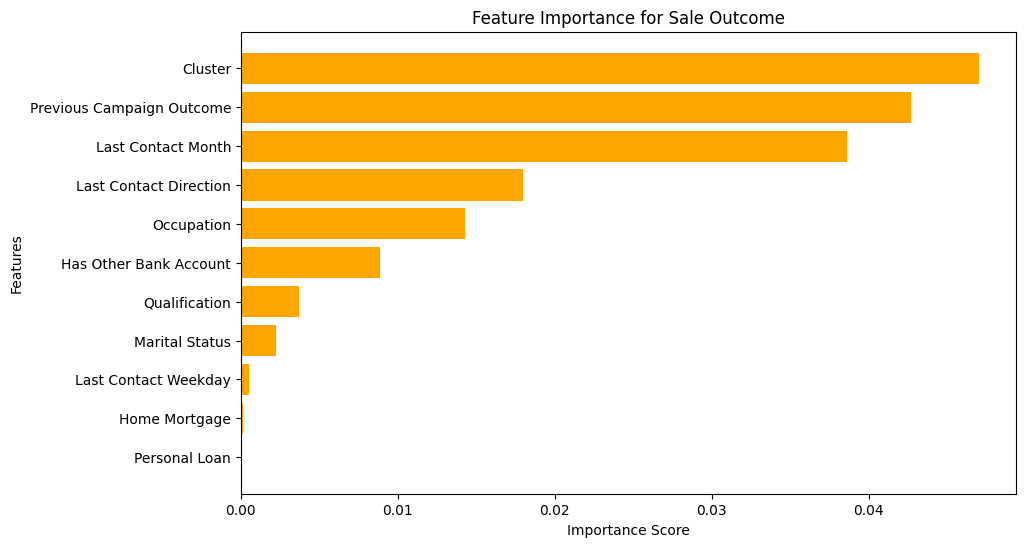

In [ ]:
features, scores = zip(*sorted_scores)
plt.figure(figsize=(10, 6))
plt.barh(features, scores, color='orange')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Sale Outcome')
plt.gca().invert_yaxis()
plt.show()

Sale Outcome :

Cluster  Sale Outcome
0        0               6712
         1                498
1        0               6619
         1               3147
2        0               5346
         1                618
Name: count, dtype: int64




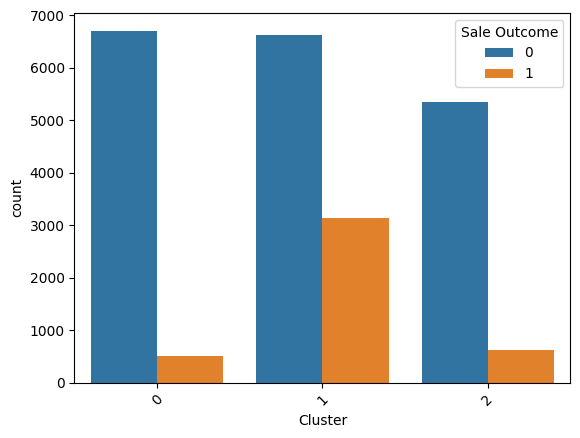

Qualification :

Cluster  Qualification
0        5                2802
         2                1654
         0                1583
         1                 825
         4                 344
         3                   2
1        0                3213
         5                2652
         2                2290
         1                1185
         4                 419
         3                   7
2        0                2019
         5                1542
         2                1254
         1                 924
         4                 219
         3                   6
Name: count, dtype: int64




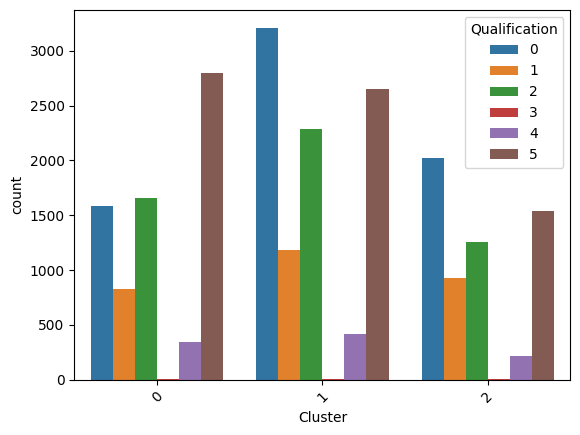

Occupation :

Cluster  Occupation
0        4             2139
         0             1493
         10             977
         1              805
         5              514
         2              307
         8              250
         7              223
         3              198
         11             161
         6               79
         9               64
1        0             2650
         4             1793
         10            1412
         1              850
         5              786
         7              657
         9              459
         2              337
         8              323
         11             264
         3              187
         6               48
2        0             1707
         10            1337
         4             1104
         1              514
         5              342
         3              208
         7              206
         8              176
         2              169
         11             111
         6    

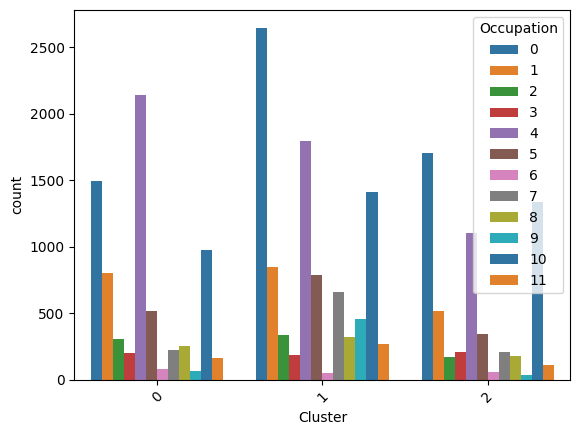

Marital Status :

Cluster  Marital Status
0        1                 4739
         3                 1625
         0                  831
         2                   15
1        1                 5384
         3                 3309
         0                 1050
         2                   23
2        1                 3681
         3                 1592
         0                  678
         2                   13
Name: count, dtype: int64




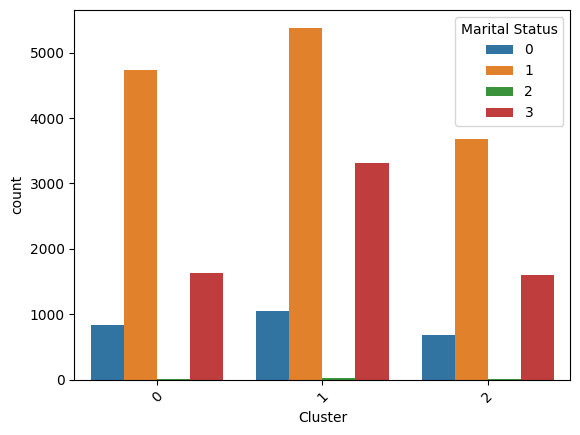

Home Mortgage :

Cluster  Home Mortgage
0        0                3676
         2                3303
         1                 231
1        2                5545
         0                3997
         1                 224
2        2                3238
         0                2611
         1                 115
Name: count, dtype: int64




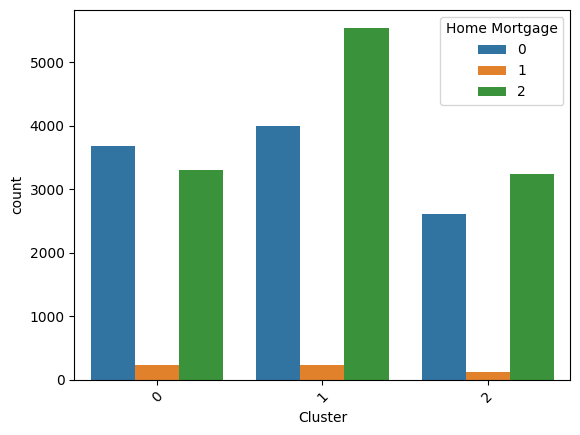

Personal Loan :

Cluster  Personal Loan
0        0                5917
         2                1062
         1                 231
1        0                8069
         2                1473
         1                 224
2        0                4891
         2                 958
         1                 115
Name: count, dtype: int64




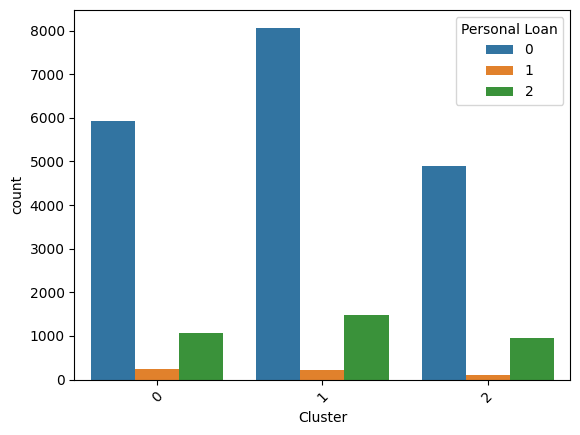

Has Other Bank Account :

Cluster  Has Other Bank Account
0        0                         5076
         1                         2134
1        0                         8941
         1                          825
2        0                         4361
         1                         1603
Name: count, dtype: int64




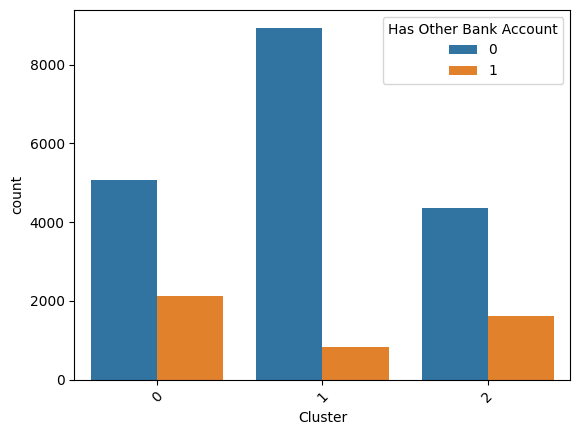

Last Contact Direction :

Cluster  Last Contact Direction
0        1                         7210
1        0                         8993
         1                          773
2        0                         5911
         1                           53
Name: count, dtype: int64




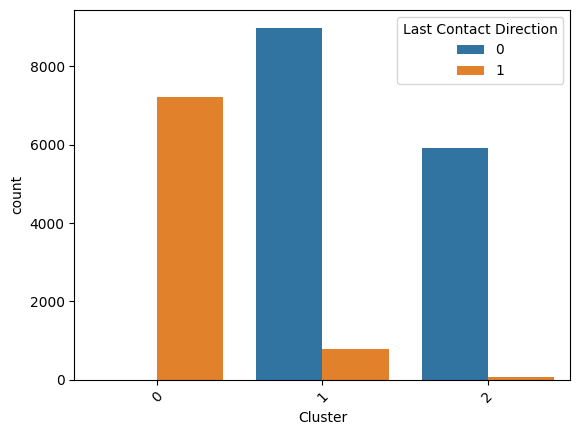

Last Contact Month :

Cluster  Last Contact Month
0        6                     4089
         4                     2292
         3                      525
         7                      185
         8                       61
         1                       36
         9                       22
1        6                     3344
         7                     1896
         0                     1533
         1                      681
         4                      637
         8                      448
         5                      389
         9                      371
         3                      339
         2                      128
2        3                     3055
         1                     2732
         7                      158
         6                        9
         4                        8
         0                        1
         2                        1
Name: count, dtype: int64




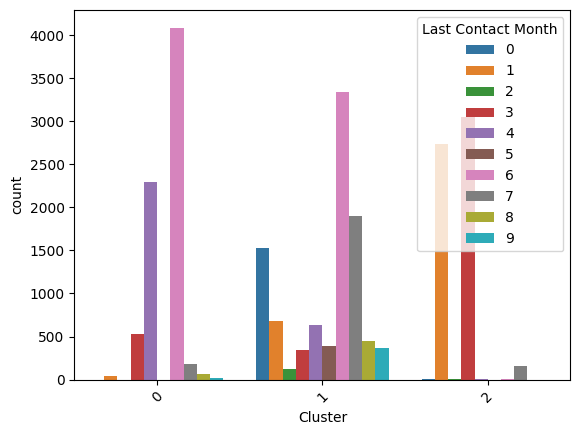

Last Contact Weekday :

Cluster  Last Contact Weekday
0        0                       1543
         4                       1495
         3                       1434
         1                       1390
         2                       1348
1        2                       2140
         1                       2072
         0                       1861
         4                       1857
         3                       1836
2        2                       1324
         1                       1261
         3                       1255
         4                       1215
         0                        909
Name: count, dtype: int64




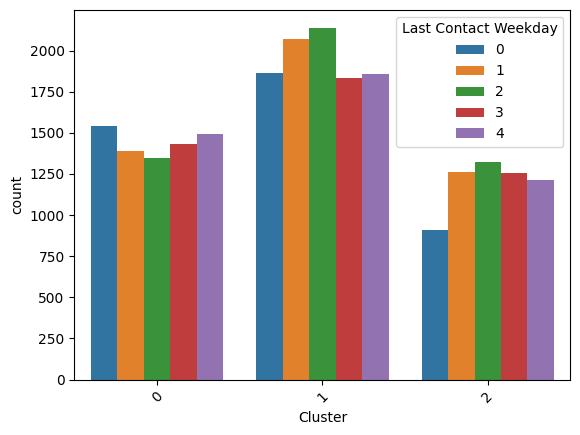

Previous Campaign Outcome :

Cluster  Previous Campaign Outcome
0        1                            7196
         0                               8
         2                               6
1        1                            6345
         0                            2373
         2                            1048
2        1                            5964
Name: count, dtype: int64




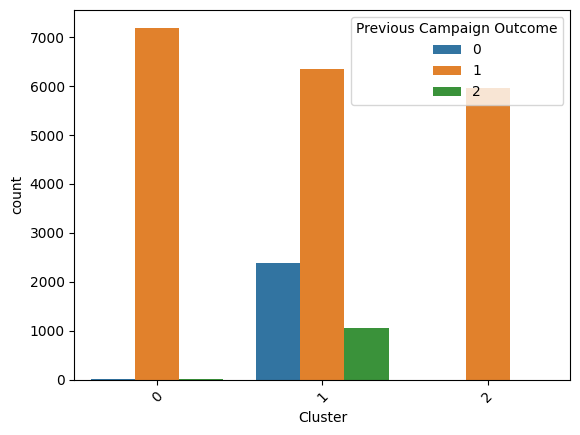

In [ ]:
cats = ['Sale Outcome', 'Qualification', 'Occupation', 'Marital Status', 'Home Mortgage', 'Personal Loan', 'Has Other Bank Account', 'Last Contact Direction', 'Last Contact Month', 'Last Contact Weekday', 'Previous Campaign Outcome']

# Write code to explore relationships
for i in cats:
    print(i, ':\n')
    print(df.groupby('Cluster')[i].value_counts())
    print('\n')
    sns.countplot(hue=df[i], x=df['Cluster'], palette='tab10')
    # Rotate labels on the x-axis
    plt.xticks(rotation=45)
    plt.show()
